In [14]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [16]:
x_train = x_train/127.5-1

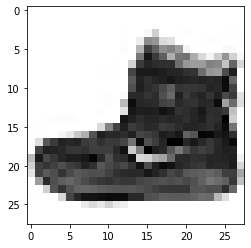

In [17]:
plt.imshow(x_train[0], cmap='Greys')

In [18]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [19]:
x_train = np.expand_dims(x_train, axis=3)

In [22]:
def create_generator():
    model = Sequential()

    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
  
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
    model.add(Reshape((28, 28, 1)))

    model.summary()

    noise = Input(shape=(100,))
    img = model(noise)

    return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dense_30 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dense_31 (Dense)             (None, 1024)             

In [23]:
def create_discriminator():
    model = Sequential()

    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=(28, 28, 1))
    validity = model(img)

    return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_______________________________________________

In [24]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [25]:
def sample_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r*c, 100))
    gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
    gen_imgs = 0.5*gen_imgs+0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
  #fig.savefig("images/%d.png" % epoch)
    plt.show()
    plt.close()


/home/toni/.local/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.800049, acc.: 32.81%] [G loss: 0.635665]


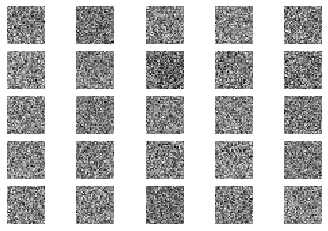

/home/toni/.local/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.471983, acc.: 71.88%] [G loss: 0.585288]
2 [D loss: 0.396557, acc.: 76.56%] [G loss: 0.588691]
3 [D loss: 0.399722, acc.: 68.75%] [G loss: 0.608376]
4 [D loss: 0.381389, acc.: 70.31%] [G loss: 0.743143]
5 [D loss: 0.342114, acc.: 81.25%] [G loss: 0.838306]
6 [D loss: 0.323048, acc.: 90.62%] [G loss: 0.943774]
7 [D loss: 0.268772, acc.: 100.00%] [G loss: 1.186810]
8 [D loss: 0.263267, acc.: 96.88%] [G loss: 1.197901]
9 [D loss: 0.223344, acc.: 98.44%] [G loss: 1.395244]
10 [D loss: 0.177964, acc.: 100.00%] [G loss: 1.445607]
11 [D loss: 0.173277, acc.: 100.00%] [G loss: 1.672023]
12 [D loss: 0.114367, acc.: 100.00%] [G loss: 1.833386]
13 [D loss: 0.121759, acc.: 100.00%] [G loss: 1.898778]
14 [D loss: 0.099974, acc.: 100.00%] [G loss: 2.011268]
15 [D loss: 0.099093, acc.: 100.00%] [G loss: 2.101777]
16 [D loss: 0.083672, acc.: 100.00%] [G loss: 2.327038]
17 [D loss: 0.087439, acc.: 100.00%] [G loss: 2.353335]
18 [D loss: 0.100701, acc.: 98.44%] [G loss: 2.325907]
19 [D loss

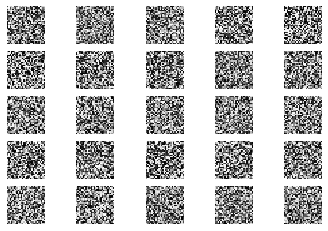

51 [D loss: 0.023961, acc.: 100.00%] [G loss: 3.643919]
52 [D loss: 0.028104, acc.: 100.00%] [G loss: 3.682817]
53 [D loss: 0.014983, acc.: 100.00%] [G loss: 3.802532]
54 [D loss: 0.027652, acc.: 100.00%] [G loss: 3.961607]
55 [D loss: 0.019091, acc.: 100.00%] [G loss: 3.922382]
56 [D loss: 0.016339, acc.: 100.00%] [G loss: 4.008835]
57 [D loss: 0.018284, acc.: 100.00%] [G loss: 3.784709]
58 [D loss: 0.024889, acc.: 100.00%] [G loss: 3.953763]
59 [D loss: 0.019364, acc.: 100.00%] [G loss: 4.005548]
60 [D loss: 0.019947, acc.: 100.00%] [G loss: 4.171698]
61 [D loss: 0.016623, acc.: 100.00%] [G loss: 4.157796]
62 [D loss: 0.026458, acc.: 100.00%] [G loss: 4.052533]
63 [D loss: 0.012939, acc.: 100.00%] [G loss: 3.983730]
64 [D loss: 0.011921, acc.: 100.00%] [G loss: 4.105158]
65 [D loss: 0.015260, acc.: 100.00%] [G loss: 3.919420]
66 [D loss: 0.016678, acc.: 100.00%] [G loss: 4.048257]
67 [D loss: 0.014729, acc.: 100.00%] [G loss: 4.124848]
68 [D loss: 0.024835, acc.: 100.00%] [G loss: 4.

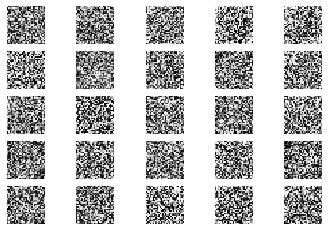

101 [D loss: 0.047990, acc.: 98.44%] [G loss: 4.573690]
102 [D loss: 0.021164, acc.: 100.00%] [G loss: 4.542925]
103 [D loss: 0.025865, acc.: 100.00%] [G loss: 4.665307]
104 [D loss: 0.011247, acc.: 100.00%] [G loss: 4.566794]
105 [D loss: 0.014306, acc.: 100.00%] [G loss: 4.657822]
106 [D loss: 0.011831, acc.: 100.00%] [G loss: 4.611926]
107 [D loss: 0.017787, acc.: 100.00%] [G loss: 4.663899]
108 [D loss: 0.009180, acc.: 100.00%] [G loss: 4.693085]
109 [D loss: 0.014112, acc.: 100.00%] [G loss: 4.618104]
110 [D loss: 0.013179, acc.: 100.00%] [G loss: 4.529663]
111 [D loss: 0.018790, acc.: 100.00%] [G loss: 4.554238]
112 [D loss: 0.015807, acc.: 100.00%] [G loss: 4.861805]
113 [D loss: 0.019381, acc.: 100.00%] [G loss: 4.565526]
114 [D loss: 0.012694, acc.: 100.00%] [G loss: 4.687028]
115 [D loss: 0.027099, acc.: 100.00%] [G loss: 4.614891]
116 [D loss: 0.026407, acc.: 100.00%] [G loss: 4.859852]
117 [D loss: 0.015189, acc.: 100.00%] [G loss: 4.990126]
118 [D loss: 0.024944, acc.: 100

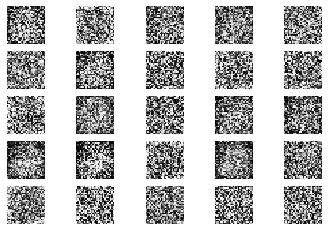

151 [D loss: 0.047307, acc.: 100.00%] [G loss: 5.249655]
152 [D loss: 0.052707, acc.: 100.00%] [G loss: 4.744248]
153 [D loss: 0.031188, acc.: 100.00%] [G loss: 4.802107]
154 [D loss: 0.063896, acc.: 98.44%] [G loss: 4.913600]
155 [D loss: 0.033388, acc.: 100.00%] [G loss: 4.569367]
156 [D loss: 0.043118, acc.: 100.00%] [G loss: 5.329724]
157 [D loss: 0.042514, acc.: 98.44%] [G loss: 4.619522]
158 [D loss: 0.039019, acc.: 100.00%] [G loss: 4.778800]
159 [D loss: 0.018201, acc.: 100.00%] [G loss: 5.156243]
160 [D loss: 0.170704, acc.: 93.75%] [G loss: 4.786695]
161 [D loss: 0.021462, acc.: 100.00%] [G loss: 4.871906]
162 [D loss: 0.066648, acc.: 96.88%] [G loss: 4.716911]
163 [D loss: 0.174793, acc.: 93.75%] [G loss: 4.726035]
164 [D loss: 0.121485, acc.: 96.88%] [G loss: 3.692143]
165 [D loss: 0.121781, acc.: 95.31%] [G loss: 3.755558]
166 [D loss: 0.092802, acc.: 96.88%] [G loss: 4.705036]
167 [D loss: 0.090125, acc.: 98.44%] [G loss: 4.698457]
168 [D loss: 0.042101, acc.: 100.00%] [G

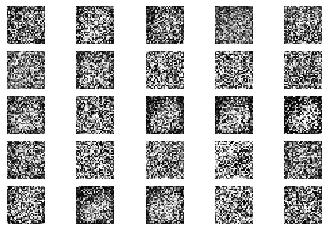

201 [D loss: 0.089326, acc.: 98.44%] [G loss: 4.612211]
202 [D loss: 0.078613, acc.: 98.44%] [G loss: 4.705127]
203 [D loss: 0.112602, acc.: 95.31%] [G loss: 4.537239]
204 [D loss: 0.046845, acc.: 100.00%] [G loss: 4.721682]
205 [D loss: 0.042405, acc.: 100.00%] [G loss: 4.686243]
206 [D loss: 0.129921, acc.: 93.75%] [G loss: 4.158868]
207 [D loss: 0.064632, acc.: 100.00%] [G loss: 4.761071]
208 [D loss: 0.139587, acc.: 96.88%] [G loss: 4.034643]
209 [D loss: 0.240805, acc.: 89.06%] [G loss: 3.844141]
210 [D loss: 0.093821, acc.: 96.88%] [G loss: 5.038316]
211 [D loss: 0.150708, acc.: 92.19%] [G loss: 3.788424]
212 [D loss: 0.124600, acc.: 95.31%] [G loss: 4.145658]
213 [D loss: 0.140736, acc.: 96.88%] [G loss: 4.254899]
214 [D loss: 0.048165, acc.: 100.00%] [G loss: 4.452406]
215 [D loss: 0.280007, acc.: 87.50%] [G loss: 4.411955]
216 [D loss: 0.100235, acc.: 98.44%] [G loss: 4.408578]
217 [D loss: 0.154729, acc.: 95.31%] [G loss: 4.009029]
218 [D loss: 0.076897, acc.: 95.31%] [G loss

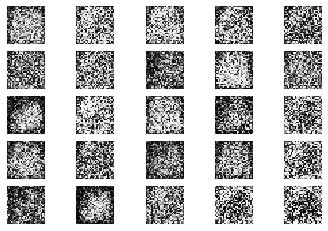

251 [D loss: 0.145539, acc.: 96.88%] [G loss: 4.241224]
252 [D loss: 0.308330, acc.: 89.06%] [G loss: 3.167105]
253 [D loss: 0.283012, acc.: 84.38%] [G loss: 4.153779]
254 [D loss: 0.078496, acc.: 96.88%] [G loss: 5.032455]
255 [D loss: 0.208879, acc.: 93.75%] [G loss: 4.300269]
256 [D loss: 0.142672, acc.: 93.75%] [G loss: 4.825861]
257 [D loss: 0.108136, acc.: 96.88%] [G loss: 3.971926]
258 [D loss: 0.121269, acc.: 95.31%] [G loss: 4.188475]
259 [D loss: 0.189301, acc.: 89.06%] [G loss: 5.080010]
260 [D loss: 0.432967, acc.: 79.69%] [G loss: 3.848182]
261 [D loss: 0.067362, acc.: 96.88%] [G loss: 4.539587]
262 [D loss: 0.128963, acc.: 96.88%] [G loss: 3.767883]
263 [D loss: 0.079530, acc.: 98.44%] [G loss: 4.639872]
264 [D loss: 0.118523, acc.: 98.44%] [G loss: 4.171068]
265 [D loss: 0.169656, acc.: 93.75%] [G loss: 4.128715]
266 [D loss: 0.090610, acc.: 96.88%] [G loss: 4.773139]
267 [D loss: 0.230109, acc.: 93.75%] [G loss: 4.060918]
268 [D loss: 0.115881, acc.: 96.88%] [G loss: 4.

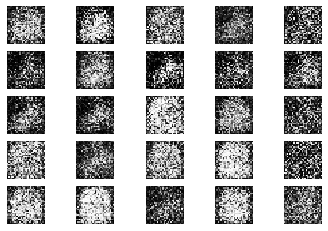

301 [D loss: 0.203050, acc.: 89.06%] [G loss: 5.158057]
302 [D loss: 0.698280, acc.: 76.56%] [G loss: 3.832568]
303 [D loss: 0.332974, acc.: 79.69%] [G loss: 3.626865]
304 [D loss: 0.156804, acc.: 95.31%] [G loss: 3.955139]
305 [D loss: 0.233676, acc.: 90.62%] [G loss: 3.634017]
306 [D loss: 0.322648, acc.: 87.50%] [G loss: 3.168172]
307 [D loss: 0.153612, acc.: 93.75%] [G loss: 3.630306]
308 [D loss: 0.282154, acc.: 85.94%] [G loss: 4.046085]
309 [D loss: 0.079084, acc.: 98.44%] [G loss: 4.149579]
310 [D loss: 0.247487, acc.: 90.62%] [G loss: 3.255210]
311 [D loss: 0.143123, acc.: 98.44%] [G loss: 2.961642]
312 [D loss: 0.374663, acc.: 79.69%] [G loss: 4.255324]
313 [D loss: 0.209795, acc.: 90.62%] [G loss: 3.912915]
314 [D loss: 0.393571, acc.: 84.38%] [G loss: 3.745462]
315 [D loss: 0.105513, acc.: 95.31%] [G loss: 4.329111]
316 [D loss: 0.362670, acc.: 85.94%] [G loss: 3.227550]
317 [D loss: 0.298435, acc.: 89.06%] [G loss: 3.226176]
318 [D loss: 0.184078, acc.: 93.75%] [G loss: 3.

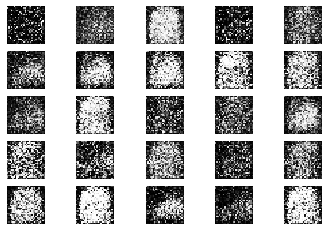

351 [D loss: 0.495693, acc.: 85.94%] [G loss: 2.965664]
352 [D loss: 0.277080, acc.: 92.19%] [G loss: 3.254836]
353 [D loss: 0.331733, acc.: 87.50%] [G loss: 3.248689]
354 [D loss: 0.254425, acc.: 89.06%] [G loss: 3.217259]
355 [D loss: 0.408367, acc.: 81.25%] [G loss: 3.807474]
356 [D loss: 0.312882, acc.: 85.94%] [G loss: 3.249254]
357 [D loss: 0.540637, acc.: 65.62%] [G loss: 3.123227]
358 [D loss: 0.117927, acc.: 98.44%] [G loss: 3.871098]
359 [D loss: 0.458332, acc.: 84.38%] [G loss: 2.955390]
360 [D loss: 0.278022, acc.: 89.06%] [G loss: 3.100011]
361 [D loss: 0.195387, acc.: 92.19%] [G loss: 4.068486]
362 [D loss: 0.184236, acc.: 95.31%] [G loss: 4.083092]
363 [D loss: 0.213552, acc.: 93.75%] [G loss: 3.496600]
364 [D loss: 0.150798, acc.: 96.88%] [G loss: 3.738938]
365 [D loss: 0.299130, acc.: 89.06%] [G loss: 2.495735]
366 [D loss: 0.135760, acc.: 96.88%] [G loss: 4.053349]
367 [D loss: 0.588308, acc.: 79.69%] [G loss: 3.465048]
368 [D loss: 0.393682, acc.: 76.56%] [G loss: 4.

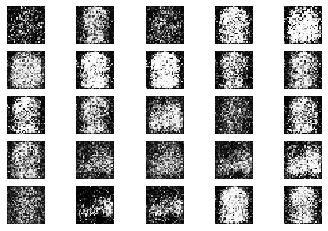

401 [D loss: 0.504982, acc.: 76.56%] [G loss: 2.738152]
402 [D loss: 0.627585, acc.: 64.06%] [G loss: 2.853988]
403 [D loss: 0.494328, acc.: 84.38%] [G loss: 2.813802]
404 [D loss: 0.498674, acc.: 76.56%] [G loss: 2.170057]
405 [D loss: 0.306890, acc.: 87.50%] [G loss: 2.795603]
406 [D loss: 0.640612, acc.: 64.06%] [G loss: 2.406491]
407 [D loss: 0.397567, acc.: 82.81%] [G loss: 2.815901]
408 [D loss: 0.734936, acc.: 59.38%] [G loss: 2.889161]
409 [D loss: 0.750620, acc.: 54.69%] [G loss: 2.016168]
410 [D loss: 0.594792, acc.: 71.88%] [G loss: 2.486976]
411 [D loss: 0.536915, acc.: 71.88%] [G loss: 2.533863]
412 [D loss: 0.654070, acc.: 75.00%] [G loss: 1.899615]
413 [D loss: 0.528769, acc.: 71.88%] [G loss: 2.367209]
414 [D loss: 0.485231, acc.: 76.56%] [G loss: 2.286144]
415 [D loss: 0.731097, acc.: 67.19%] [G loss: 2.655530]
416 [D loss: 0.805927, acc.: 59.38%] [G loss: 1.925968]
417 [D loss: 0.482264, acc.: 76.56%] [G loss: 2.040340]
418 [D loss: 0.373435, acc.: 85.94%] [G loss: 2.

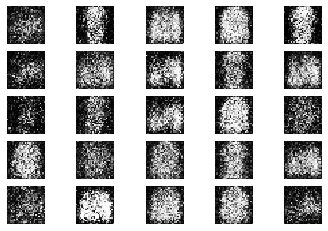

451 [D loss: 0.765137, acc.: 75.00%] [G loss: 1.778329]
452 [D loss: 0.724884, acc.: 59.38%] [G loss: 1.487954]
453 [D loss: 0.752348, acc.: 62.50%] [G loss: 1.229809]
454 [D loss: 0.502214, acc.: 73.44%] [G loss: 1.516511]
455 [D loss: 0.650332, acc.: 64.06%] [G loss: 1.439241]
456 [D loss: 0.881052, acc.: 51.56%] [G loss: 1.413832]
457 [D loss: 0.686553, acc.: 65.62%] [G loss: 1.311761]
458 [D loss: 0.699201, acc.: 57.81%] [G loss: 1.278800]
459 [D loss: 0.526073, acc.: 81.25%] [G loss: 1.438582]
460 [D loss: 0.634586, acc.: 67.19%] [G loss: 1.250904]
461 [D loss: 0.656560, acc.: 65.62%] [G loss: 1.534455]
462 [D loss: 0.514168, acc.: 75.00%] [G loss: 1.397272]
463 [D loss: 0.770303, acc.: 56.25%] [G loss: 1.153720]
464 [D loss: 0.834048, acc.: 56.25%] [G loss: 1.446849]
465 [D loss: 0.750301, acc.: 60.94%] [G loss: 1.528088]
466 [D loss: 0.703518, acc.: 62.50%] [G loss: 1.130012]
467 [D loss: 0.564253, acc.: 64.06%] [G loss: 1.461597]
468 [D loss: 0.616847, acc.: 68.75%] [G loss: 1.

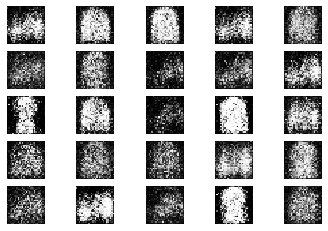

501 [D loss: 0.689075, acc.: 57.81%] [G loss: 1.150079]
502 [D loss: 0.647998, acc.: 68.75%] [G loss: 1.201186]
503 [D loss: 0.727242, acc.: 62.50%] [G loss: 0.905623]
504 [D loss: 0.494746, acc.: 71.88%] [G loss: 1.284839]
505 [D loss: 0.639966, acc.: 67.19%] [G loss: 1.320027]
506 [D loss: 0.625788, acc.: 71.88%] [G loss: 1.026603]
507 [D loss: 0.586595, acc.: 75.00%] [G loss: 1.039218]
508 [D loss: 0.649074, acc.: 70.31%] [G loss: 1.306238]
509 [D loss: 0.606797, acc.: 67.19%] [G loss: 1.384476]
510 [D loss: 0.569539, acc.: 71.88%] [G loss: 1.389385]
511 [D loss: 0.614997, acc.: 62.50%] [G loss: 1.216876]
512 [D loss: 0.693451, acc.: 54.69%] [G loss: 1.168170]
513 [D loss: 0.617757, acc.: 65.62%] [G loss: 1.201487]
514 [D loss: 0.588223, acc.: 73.44%] [G loss: 1.235987]
515 [D loss: 0.558686, acc.: 70.31%] [G loss: 1.232970]
516 [D loss: 0.520679, acc.: 73.44%] [G loss: 1.271978]
517 [D loss: 0.548647, acc.: 75.00%] [G loss: 1.152414]
518 [D loss: 0.601868, acc.: 65.62%] [G loss: 1.

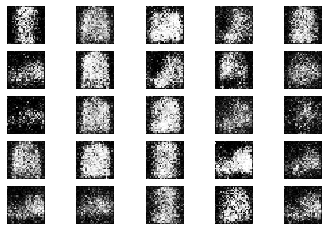

551 [D loss: 0.697753, acc.: 53.12%] [G loss: 1.028399]
552 [D loss: 0.622051, acc.: 64.06%] [G loss: 1.147665]
553 [D loss: 0.632723, acc.: 57.81%] [G loss: 1.160693]
554 [D loss: 0.628817, acc.: 64.06%] [G loss: 1.164500]
555 [D loss: 0.656549, acc.: 64.06%] [G loss: 1.027742]
556 [D loss: 0.609447, acc.: 64.06%] [G loss: 1.024709]
557 [D loss: 0.638158, acc.: 62.50%] [G loss: 1.136289]
558 [D loss: 0.658830, acc.: 70.31%] [G loss: 1.078799]
559 [D loss: 0.532894, acc.: 78.12%] [G loss: 0.997846]
560 [D loss: 0.573696, acc.: 68.75%] [G loss: 1.164548]
561 [D loss: 0.651611, acc.: 59.38%] [G loss: 1.036985]
562 [D loss: 0.631784, acc.: 62.50%] [G loss: 1.001681]
563 [D loss: 0.652058, acc.: 60.94%] [G loss: 1.009975]
564 [D loss: 0.560684, acc.: 65.62%] [G loss: 1.132802]
565 [D loss: 0.671175, acc.: 68.75%] [G loss: 1.173596]
566 [D loss: 0.683329, acc.: 64.06%] [G loss: 1.123782]
567 [D loss: 0.557615, acc.: 75.00%] [G loss: 1.135501]
568 [D loss: 0.711042, acc.: 51.56%] [G loss: 1.

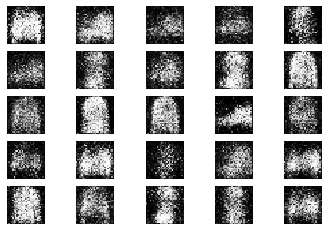

601 [D loss: 0.644559, acc.: 67.19%] [G loss: 0.945186]
602 [D loss: 0.641975, acc.: 62.50%] [G loss: 1.047173]
603 [D loss: 0.532483, acc.: 73.44%] [G loss: 1.100542]
604 [D loss: 0.558350, acc.: 78.12%] [G loss: 1.095674]
605 [D loss: 0.501028, acc.: 84.38%] [G loss: 1.009481]
606 [D loss: 0.606412, acc.: 68.75%] [G loss: 0.930830]
607 [D loss: 0.608199, acc.: 68.75%] [G loss: 0.984518]
608 [D loss: 0.623979, acc.: 71.88%] [G loss: 1.053967]
609 [D loss: 0.569583, acc.: 70.31%] [G loss: 1.103653]
610 [D loss: 0.622823, acc.: 64.06%] [G loss: 1.063067]
611 [D loss: 0.587156, acc.: 65.62%] [G loss: 1.139290]
612 [D loss: 0.562109, acc.: 67.19%] [G loss: 1.166586]
613 [D loss: 0.680828, acc.: 68.75%] [G loss: 1.034204]
614 [D loss: 0.617451, acc.: 60.94%] [G loss: 1.047178]
615 [D loss: 0.650431, acc.: 67.19%] [G loss: 1.005624]
616 [D loss: 0.496757, acc.: 78.12%] [G loss: 1.031211]
617 [D loss: 0.577783, acc.: 67.19%] [G loss: 0.998998]
618 [D loss: 0.679370, acc.: 64.06%] [G loss: 0.

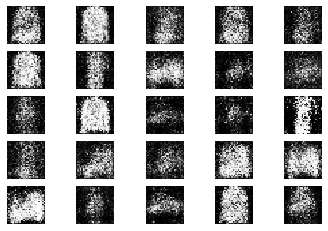

651 [D loss: 0.680487, acc.: 60.94%] [G loss: 1.073538]
652 [D loss: 0.676253, acc.: 59.38%] [G loss: 1.036332]
653 [D loss: 0.616654, acc.: 68.75%] [G loss: 1.043253]
654 [D loss: 0.633282, acc.: 62.50%] [G loss: 1.056177]
655 [D loss: 0.569539, acc.: 73.44%] [G loss: 1.012548]
656 [D loss: 0.546193, acc.: 79.69%] [G loss: 1.036735]
657 [D loss: 0.595092, acc.: 68.75%] [G loss: 1.112844]
658 [D loss: 0.573594, acc.: 67.19%] [G loss: 1.127337]
659 [D loss: 0.509275, acc.: 78.12%] [G loss: 1.094198]
660 [D loss: 0.636689, acc.: 56.25%] [G loss: 1.019770]
661 [D loss: 0.587045, acc.: 59.38%] [G loss: 1.091388]
662 [D loss: 0.560426, acc.: 70.31%] [G loss: 1.231417]
663 [D loss: 0.595619, acc.: 73.44%] [G loss: 1.082357]
664 [D loss: 0.578474, acc.: 75.00%] [G loss: 1.051213]
665 [D loss: 0.573823, acc.: 68.75%] [G loss: 0.973570]
666 [D loss: 0.601528, acc.: 64.06%] [G loss: 0.983469]
667 [D loss: 0.586856, acc.: 68.75%] [G loss: 0.998395]
668 [D loss: 0.606426, acc.: 68.75%] [G loss: 1.

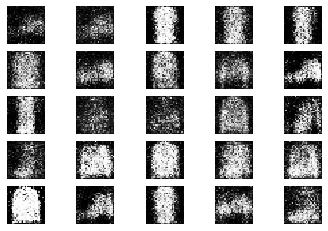

701 [D loss: 0.611001, acc.: 60.94%] [G loss: 1.057047]
702 [D loss: 0.644994, acc.: 46.88%] [G loss: 1.039922]
703 [D loss: 0.571981, acc.: 73.44%] [G loss: 1.080758]
704 [D loss: 0.587944, acc.: 62.50%] [G loss: 1.117758]
705 [D loss: 0.666569, acc.: 64.06%] [G loss: 1.101045]
706 [D loss: 0.640802, acc.: 67.19%] [G loss: 0.990578]
707 [D loss: 0.552440, acc.: 81.25%] [G loss: 0.974908]
708 [D loss: 0.656237, acc.: 62.50%] [G loss: 1.004240]
709 [D loss: 0.594563, acc.: 60.94%] [G loss: 0.996067]
710 [D loss: 0.602048, acc.: 56.25%] [G loss: 1.132468]
711 [D loss: 0.612916, acc.: 67.19%] [G loss: 1.108661]
712 [D loss: 0.642473, acc.: 64.06%] [G loss: 1.024654]
713 [D loss: 0.573424, acc.: 73.44%] [G loss: 0.979815]
714 [D loss: 0.589826, acc.: 65.62%] [G loss: 1.041211]
715 [D loss: 0.592652, acc.: 64.06%] [G loss: 1.076142]
716 [D loss: 0.589415, acc.: 75.00%] [G loss: 0.959106]
717 [D loss: 0.631563, acc.: 65.62%] [G loss: 0.889473]
718 [D loss: 0.503999, acc.: 75.00%] [G loss: 1.

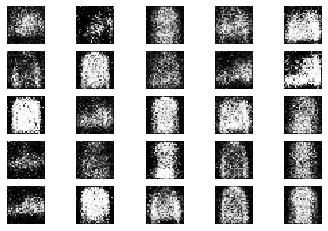

751 [D loss: 0.537295, acc.: 73.44%] [G loss: 0.933514]
752 [D loss: 0.580783, acc.: 70.31%] [G loss: 1.018332]
753 [D loss: 0.676168, acc.: 65.62%] [G loss: 0.994680]
754 [D loss: 0.637109, acc.: 68.75%] [G loss: 0.984085]
755 [D loss: 0.639812, acc.: 71.88%] [G loss: 0.989528]
756 [D loss: 0.614556, acc.: 67.19%] [G loss: 1.046267]
757 [D loss: 0.485340, acc.: 82.81%] [G loss: 1.069844]
758 [D loss: 0.515003, acc.: 78.12%] [G loss: 1.080553]
759 [D loss: 0.491138, acc.: 76.56%] [G loss: 0.979383]
760 [D loss: 0.537697, acc.: 71.88%] [G loss: 0.989113]
761 [D loss: 0.606443, acc.: 65.62%] [G loss: 1.155846]
762 [D loss: 0.540333, acc.: 76.56%] [G loss: 0.984701]
763 [D loss: 0.515580, acc.: 78.12%] [G loss: 1.099951]
764 [D loss: 0.650969, acc.: 62.50%] [G loss: 1.024598]
765 [D loss: 0.543068, acc.: 78.12%] [G loss: 1.050958]
766 [D loss: 0.518490, acc.: 75.00%] [G loss: 1.035851]
767 [D loss: 0.532052, acc.: 76.56%] [G loss: 1.028160]
768 [D loss: 0.596477, acc.: 65.62%] [G loss: 0.

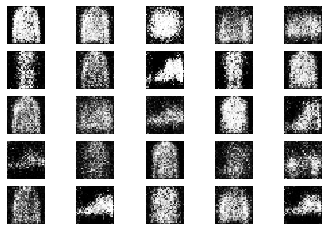

801 [D loss: 0.627921, acc.: 60.94%] [G loss: 1.105925]
802 [D loss: 0.636395, acc.: 68.75%] [G loss: 1.151575]
803 [D loss: 0.538996, acc.: 76.56%] [G loss: 1.171616]
804 [D loss: 0.566666, acc.: 70.31%] [G loss: 1.051042]
805 [D loss: 0.583443, acc.: 70.31%] [G loss: 1.129749]
806 [D loss: 0.560438, acc.: 68.75%] [G loss: 1.042054]
807 [D loss: 0.633395, acc.: 68.75%] [G loss: 1.152754]
808 [D loss: 0.586228, acc.: 73.44%] [G loss: 1.031917]
809 [D loss: 0.481423, acc.: 81.25%] [G loss: 0.949037]
810 [D loss: 0.590827, acc.: 67.19%] [G loss: 1.008441]
811 [D loss: 0.541927, acc.: 75.00%] [G loss: 1.111305]
812 [D loss: 0.641872, acc.: 65.62%] [G loss: 1.121462]
813 [D loss: 0.604621, acc.: 67.19%] [G loss: 1.139088]
814 [D loss: 0.600183, acc.: 70.31%] [G loss: 0.927696]
815 [D loss: 0.643515, acc.: 59.38%] [G loss: 0.942573]
816 [D loss: 0.560902, acc.: 65.62%] [G loss: 1.088049]
817 [D loss: 0.602331, acc.: 67.19%] [G loss: 1.037727]
818 [D loss: 0.628122, acc.: 71.88%] [G loss: 1.

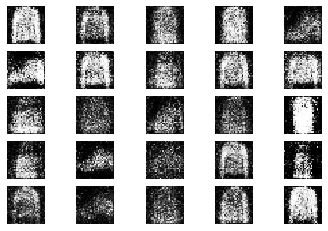

851 [D loss: 0.634381, acc.: 60.94%] [G loss: 1.121195]
852 [D loss: 0.622933, acc.: 68.75%] [G loss: 1.029280]
853 [D loss: 0.528848, acc.: 73.44%] [G loss: 1.007380]
854 [D loss: 0.541305, acc.: 76.56%] [G loss: 1.050992]
855 [D loss: 0.651028, acc.: 62.50%] [G loss: 1.086456]
856 [D loss: 0.604161, acc.: 60.94%] [G loss: 1.145800]
857 [D loss: 0.623761, acc.: 70.31%] [G loss: 1.059007]
858 [D loss: 0.654632, acc.: 64.06%] [G loss: 1.083047]
859 [D loss: 0.592618, acc.: 68.75%] [G loss: 1.055976]
860 [D loss: 0.655627, acc.: 60.94%] [G loss: 1.158687]
861 [D loss: 0.561828, acc.: 65.62%] [G loss: 1.090160]
862 [D loss: 0.607959, acc.: 67.19%] [G loss: 1.155466]
863 [D loss: 0.570324, acc.: 71.88%] [G loss: 1.007686]
864 [D loss: 0.592271, acc.: 64.06%] [G loss: 0.984388]
865 [D loss: 0.569821, acc.: 68.75%] [G loss: 1.002683]
866 [D loss: 0.630943, acc.: 60.94%] [G loss: 1.018434]
867 [D loss: 0.530338, acc.: 78.12%] [G loss: 1.171115]
868 [D loss: 0.573155, acc.: 68.75%] [G loss: 0.

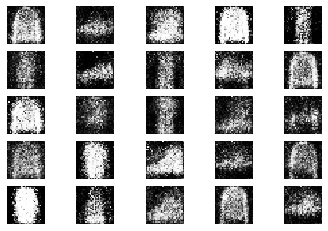

901 [D loss: 0.570582, acc.: 70.31%] [G loss: 1.157447]
902 [D loss: 0.633244, acc.: 59.38%] [G loss: 1.094893]
903 [D loss: 0.576590, acc.: 71.88%] [G loss: 1.059153]
904 [D loss: 0.622389, acc.: 67.19%] [G loss: 0.888732]
905 [D loss: 0.589712, acc.: 73.44%] [G loss: 0.946340]
906 [D loss: 0.567633, acc.: 75.00%] [G loss: 0.997163]
907 [D loss: 0.623802, acc.: 67.19%] [G loss: 0.977673]
908 [D loss: 0.607132, acc.: 70.31%] [G loss: 0.987552]
909 [D loss: 0.556492, acc.: 76.56%] [G loss: 0.937845]
910 [D loss: 0.635442, acc.: 60.94%] [G loss: 0.965258]
911 [D loss: 0.517390, acc.: 76.56%] [G loss: 0.985807]
912 [D loss: 0.647997, acc.: 60.94%] [G loss: 1.014601]
913 [D loss: 0.577243, acc.: 71.88%] [G loss: 1.011803]
914 [D loss: 0.604438, acc.: 67.19%] [G loss: 0.963313]
915 [D loss: 0.606747, acc.: 70.31%] [G loss: 1.014184]
916 [D loss: 0.564588, acc.: 75.00%] [G loss: 0.916210]
917 [D loss: 0.617604, acc.: 67.19%] [G loss: 0.923326]
918 [D loss: 0.551508, acc.: 81.25%] [G loss: 1.

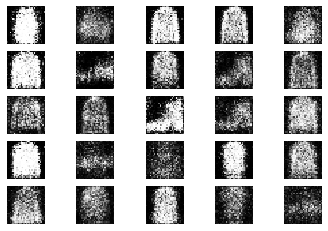

951 [D loss: 0.558624, acc.: 67.19%] [G loss: 0.997531]
952 [D loss: 0.632049, acc.: 64.06%] [G loss: 0.980294]
953 [D loss: 0.555282, acc.: 78.12%] [G loss: 0.984591]
954 [D loss: 0.542376, acc.: 79.69%] [G loss: 1.014576]
955 [D loss: 0.617213, acc.: 62.50%] [G loss: 0.998689]
956 [D loss: 0.605149, acc.: 65.62%] [G loss: 0.879184]
957 [D loss: 0.679813, acc.: 50.00%] [G loss: 0.977353]
958 [D loss: 0.677182, acc.: 60.94%] [G loss: 0.986515]
959 [D loss: 0.646841, acc.: 65.62%] [G loss: 0.872468]
960 [D loss: 0.581911, acc.: 68.75%] [G loss: 0.899205]
961 [D loss: 0.554383, acc.: 75.00%] [G loss: 1.009452]
962 [D loss: 0.558397, acc.: 79.69%] [G loss: 0.983196]
963 [D loss: 0.590402, acc.: 65.62%] [G loss: 0.997853]
964 [D loss: 0.646183, acc.: 67.19%] [G loss: 1.034181]
965 [D loss: 0.534016, acc.: 75.00%] [G loss: 0.950589]
966 [D loss: 0.615236, acc.: 60.94%] [G loss: 0.953224]
967 [D loss: 0.593640, acc.: 70.31%] [G loss: 0.969799]
968 [D loss: 0.633827, acc.: 65.62%] [G loss: 0.

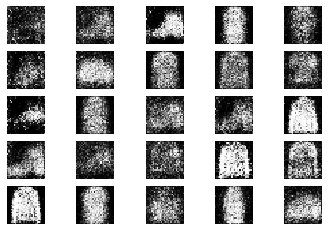

1001 [D loss: 0.658182, acc.: 62.50%] [G loss: 1.054841]
1002 [D loss: 0.586891, acc.: 64.06%] [G loss: 1.041641]
1003 [D loss: 0.645358, acc.: 60.94%] [G loss: 0.948126]
1004 [D loss: 0.588776, acc.: 70.31%] [G loss: 0.900385]
1005 [D loss: 0.530272, acc.: 75.00%] [G loss: 0.918833]
1006 [D loss: 0.521518, acc.: 76.56%] [G loss: 1.084710]
1007 [D loss: 0.653192, acc.: 65.62%] [G loss: 1.017651]
1008 [D loss: 0.614010, acc.: 67.19%] [G loss: 0.879662]
1009 [D loss: 0.682139, acc.: 60.94%] [G loss: 1.059879]
1010 [D loss: 0.672132, acc.: 64.06%] [G loss: 1.019184]
1011 [D loss: 0.583217, acc.: 65.62%] [G loss: 1.048665]
1012 [D loss: 0.586112, acc.: 73.44%] [G loss: 0.974425]
1013 [D loss: 0.585075, acc.: 76.56%] [G loss: 1.042755]
1014 [D loss: 0.601603, acc.: 67.19%] [G loss: 0.993505]
1015 [D loss: 0.562295, acc.: 76.56%] [G loss: 0.998020]
1016 [D loss: 0.596103, acc.: 68.75%] [G loss: 0.980954]
1017 [D loss: 0.587908, acc.: 71.88%] [G loss: 1.009717]
1018 [D loss: 0.590697, acc.: 7

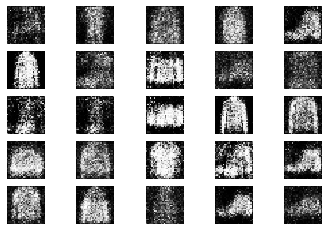

1051 [D loss: 0.555586, acc.: 67.19%] [G loss: 0.984990]
1052 [D loss: 0.600212, acc.: 67.19%] [G loss: 0.861922]
1053 [D loss: 0.618219, acc.: 62.50%] [G loss: 1.036383]
1054 [D loss: 0.586220, acc.: 70.31%] [G loss: 1.085371]
1055 [D loss: 0.678033, acc.: 51.56%] [G loss: 1.046222]
1056 [D loss: 0.574957, acc.: 79.69%] [G loss: 0.962692]
1057 [D loss: 0.639435, acc.: 62.50%] [G loss: 0.911891]
1058 [D loss: 0.609000, acc.: 67.19%] [G loss: 1.041183]
1059 [D loss: 0.590641, acc.: 67.19%] [G loss: 1.040295]
1060 [D loss: 0.560134, acc.: 68.75%] [G loss: 1.011107]
1061 [D loss: 0.625990, acc.: 65.62%] [G loss: 1.019502]
1062 [D loss: 0.538642, acc.: 71.88%] [G loss: 1.037212]
1063 [D loss: 0.600413, acc.: 64.06%] [G loss: 0.891856]
1064 [D loss: 0.564448, acc.: 75.00%] [G loss: 0.916362]
1065 [D loss: 0.610010, acc.: 70.31%] [G loss: 0.839366]
1066 [D loss: 0.564312, acc.: 75.00%] [G loss: 0.887675]
1067 [D loss: 0.511216, acc.: 79.69%] [G loss: 1.076661]
1068 [D loss: 0.655766, acc.: 5

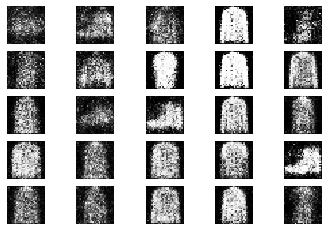

1101 [D loss: 0.704131, acc.: 54.69%] [G loss: 0.872002]
1102 [D loss: 0.506388, acc.: 81.25%] [G loss: 0.990835]
1103 [D loss: 0.677151, acc.: 59.38%] [G loss: 0.972628]
1104 [D loss: 0.607261, acc.: 67.19%] [G loss: 0.937516]
1105 [D loss: 0.627978, acc.: 62.50%] [G loss: 0.966026]
1106 [D loss: 0.622147, acc.: 62.50%] [G loss: 0.967817]
1107 [D loss: 0.597076, acc.: 70.31%] [G loss: 0.993936]
1108 [D loss: 0.654373, acc.: 68.75%] [G loss: 1.078157]
1109 [D loss: 0.572177, acc.: 78.12%] [G loss: 1.011611]
1110 [D loss: 0.670119, acc.: 54.69%] [G loss: 1.021763]
1111 [D loss: 0.578892, acc.: 68.75%] [G loss: 0.913432]
1112 [D loss: 0.650390, acc.: 57.81%] [G loss: 0.904469]
1113 [D loss: 0.601055, acc.: 62.50%] [G loss: 1.020417]
1114 [D loss: 0.621434, acc.: 73.44%] [G loss: 0.988166]
1115 [D loss: 0.589172, acc.: 75.00%] [G loss: 0.931183]
1116 [D loss: 0.600931, acc.: 68.75%] [G loss: 0.886043]
1117 [D loss: 0.657871, acc.: 68.75%] [G loss: 0.943526]
1118 [D loss: 0.637459, acc.: 7

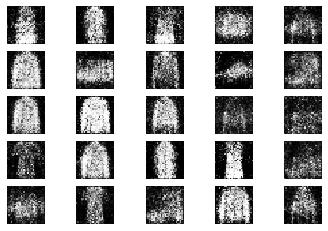

1151 [D loss: 0.643935, acc.: 62.50%] [G loss: 0.888291]
1152 [D loss: 0.629265, acc.: 62.50%] [G loss: 1.043083]
1153 [D loss: 0.572903, acc.: 62.50%] [G loss: 1.023378]
1154 [D loss: 0.581193, acc.: 70.31%] [G loss: 1.088825]
1155 [D loss: 0.713562, acc.: 54.69%] [G loss: 0.963948]
1156 [D loss: 0.563078, acc.: 73.44%] [G loss: 0.948887]
1157 [D loss: 0.580638, acc.: 64.06%] [G loss: 0.945793]
1158 [D loss: 0.659733, acc.: 57.81%] [G loss: 1.009186]
1159 [D loss: 0.597250, acc.: 62.50%] [G loss: 0.967826]
1160 [D loss: 0.552046, acc.: 71.88%] [G loss: 0.891885]
1161 [D loss: 0.610765, acc.: 65.62%] [G loss: 0.919885]
1162 [D loss: 0.578880, acc.: 67.19%] [G loss: 0.960045]
1163 [D loss: 0.598862, acc.: 65.62%] [G loss: 0.920032]
1164 [D loss: 0.617269, acc.: 68.75%] [G loss: 0.983093]
1165 [D loss: 0.497743, acc.: 75.00%] [G loss: 1.047426]
1166 [D loss: 0.607975, acc.: 70.31%] [G loss: 0.979648]
1167 [D loss: 0.615986, acc.: 64.06%] [G loss: 0.985903]
1168 [D loss: 0.585988, acc.: 6

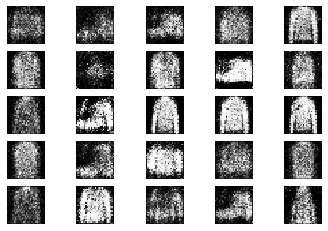

1201 [D loss: 0.668955, acc.: 64.06%] [G loss: 0.961738]
1202 [D loss: 0.577644, acc.: 67.19%] [G loss: 1.026853]
1203 [D loss: 0.571612, acc.: 70.31%] [G loss: 0.958179]
1204 [D loss: 0.598006, acc.: 70.31%] [G loss: 0.927996]
1205 [D loss: 0.705350, acc.: 46.88%] [G loss: 0.919400]
1206 [D loss: 0.605947, acc.: 73.44%] [G loss: 0.947384]
1207 [D loss: 0.625044, acc.: 60.94%] [G loss: 0.933526]
1208 [D loss: 0.642144, acc.: 54.69%] [G loss: 1.029269]
1209 [D loss: 0.711825, acc.: 53.12%] [G loss: 0.942145]
1210 [D loss: 0.611539, acc.: 68.75%] [G loss: 0.958730]
1211 [D loss: 0.620806, acc.: 65.62%] [G loss: 0.938640]
1212 [D loss: 0.605753, acc.: 70.31%] [G loss: 1.020855]
1213 [D loss: 0.603361, acc.: 71.88%] [G loss: 0.906014]
1214 [D loss: 0.601101, acc.: 67.19%] [G loss: 0.864046]
1215 [D loss: 0.633710, acc.: 62.50%] [G loss: 0.936679]
1216 [D loss: 0.676515, acc.: 60.94%] [G loss: 0.918544]
1217 [D loss: 0.682837, acc.: 60.94%] [G loss: 1.050413]
1218 [D loss: 0.522322, acc.: 7

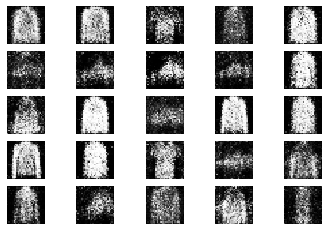

1251 [D loss: 0.704334, acc.: 53.12%] [G loss: 1.045817]
1252 [D loss: 0.597786, acc.: 70.31%] [G loss: 1.042441]
1253 [D loss: 0.561966, acc.: 78.12%] [G loss: 1.026753]
1254 [D loss: 0.651744, acc.: 60.94%] [G loss: 0.959812]
1255 [D loss: 0.679823, acc.: 56.25%] [G loss: 0.881241]
1256 [D loss: 0.601314, acc.: 65.62%] [G loss: 0.903484]
1257 [D loss: 0.650426, acc.: 62.50%] [G loss: 0.944239]
1258 [D loss: 0.576426, acc.: 68.75%] [G loss: 0.872195]
1259 [D loss: 0.637305, acc.: 64.06%] [G loss: 0.998270]
1260 [D loss: 0.653386, acc.: 60.94%] [G loss: 0.938444]
1261 [D loss: 0.600278, acc.: 67.19%] [G loss: 0.924183]
1262 [D loss: 0.646329, acc.: 64.06%] [G loss: 0.867683]
1263 [D loss: 0.643388, acc.: 67.19%] [G loss: 1.054418]
1264 [D loss: 0.593803, acc.: 71.88%] [G loss: 0.874439]
1265 [D loss: 0.593002, acc.: 70.31%] [G loss: 0.943453]
1266 [D loss: 0.621134, acc.: 67.19%] [G loss: 0.902977]
1267 [D loss: 0.609226, acc.: 64.06%] [G loss: 0.907018]
1268 [D loss: 0.596383, acc.: 7

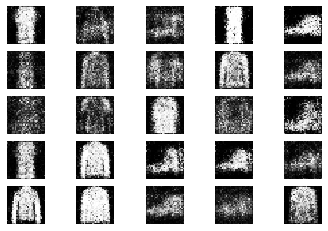

1301 [D loss: 0.603980, acc.: 73.44%] [G loss: 0.954154]
1302 [D loss: 0.586070, acc.: 70.31%] [G loss: 0.841994]
1303 [D loss: 0.566918, acc.: 75.00%] [G loss: 0.895053]
1304 [D loss: 0.584060, acc.: 71.88%] [G loss: 0.913652]
1305 [D loss: 0.617610, acc.: 70.31%] [G loss: 0.927771]
1306 [D loss: 0.563180, acc.: 73.44%] [G loss: 1.036087]
1307 [D loss: 0.631184, acc.: 65.62%] [G loss: 0.949761]
1308 [D loss: 0.602692, acc.: 67.19%] [G loss: 1.018650]
1309 [D loss: 0.637960, acc.: 60.94%] [G loss: 0.984074]
1310 [D loss: 0.600735, acc.: 65.62%] [G loss: 0.951452]
1311 [D loss: 0.635842, acc.: 71.88%] [G loss: 0.930703]
1312 [D loss: 0.624443, acc.: 68.75%] [G loss: 0.918572]
1313 [D loss: 0.540982, acc.: 73.44%] [G loss: 0.898898]
1314 [D loss: 0.628453, acc.: 67.19%] [G loss: 0.880565]
1315 [D loss: 0.558629, acc.: 68.75%] [G loss: 0.992086]
1316 [D loss: 0.651479, acc.: 64.06%] [G loss: 0.849711]
1317 [D loss: 0.613635, acc.: 73.44%] [G loss: 1.012900]
1318 [D loss: 0.640938, acc.: 6

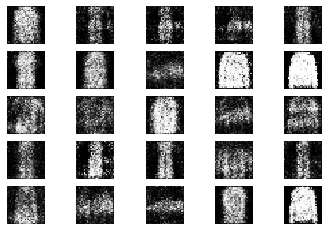

1351 [D loss: 0.678288, acc.: 54.69%] [G loss: 0.891732]
1352 [D loss: 0.688291, acc.: 57.81%] [G loss: 0.981525]
1353 [D loss: 0.641608, acc.: 59.38%] [G loss: 0.922271]
1354 [D loss: 0.643144, acc.: 71.88%] [G loss: 0.889471]
1355 [D loss: 0.670784, acc.: 62.50%] [G loss: 0.797526]
1356 [D loss: 0.629740, acc.: 57.81%] [G loss: 0.868623]
1357 [D loss: 0.599514, acc.: 60.94%] [G loss: 0.926793]
1358 [D loss: 0.671199, acc.: 54.69%] [G loss: 0.957497]
1359 [D loss: 0.600438, acc.: 65.62%] [G loss: 0.931085]
1360 [D loss: 0.635899, acc.: 67.19%] [G loss: 1.045407]
1361 [D loss: 0.651830, acc.: 71.88%] [G loss: 0.858600]
1362 [D loss: 0.603592, acc.: 75.00%] [G loss: 0.883678]
1363 [D loss: 0.707909, acc.: 48.44%] [G loss: 0.843269]
1364 [D loss: 0.612656, acc.: 70.31%] [G loss: 0.970371]
1365 [D loss: 0.555659, acc.: 76.56%] [G loss: 1.026814]
1366 [D loss: 0.643923, acc.: 62.50%] [G loss: 1.014554]
1367 [D loss: 0.657441, acc.: 60.94%] [G loss: 0.920869]
1368 [D loss: 0.722317, acc.: 6

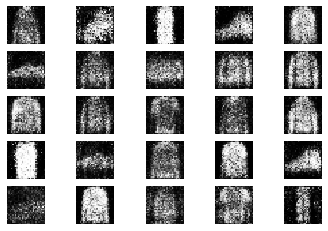

1401 [D loss: 0.610516, acc.: 65.62%] [G loss: 0.903081]
1402 [D loss: 0.619497, acc.: 64.06%] [G loss: 0.939540]
1403 [D loss: 0.581908, acc.: 70.31%] [G loss: 0.937610]
1404 [D loss: 0.694078, acc.: 57.81%] [G loss: 0.935030]
1405 [D loss: 0.631938, acc.: 64.06%] [G loss: 0.811897]
1406 [D loss: 0.587832, acc.: 68.75%] [G loss: 0.971163]
1407 [D loss: 0.587654, acc.: 73.44%] [G loss: 0.840321]
1408 [D loss: 0.666199, acc.: 67.19%] [G loss: 0.899935]
1409 [D loss: 0.622652, acc.: 64.06%] [G loss: 0.858727]
1410 [D loss: 0.578074, acc.: 71.88%] [G loss: 0.879647]
1411 [D loss: 0.559063, acc.: 70.31%] [G loss: 0.921188]
1412 [D loss: 0.579154, acc.: 73.44%] [G loss: 0.957370]
1413 [D loss: 0.618184, acc.: 60.94%] [G loss: 0.983742]
1414 [D loss: 0.621493, acc.: 65.62%] [G loss: 1.002289]
1415 [D loss: 0.613667, acc.: 62.50%] [G loss: 0.895584]
1416 [D loss: 0.586196, acc.: 68.75%] [G loss: 0.877891]
1417 [D loss: 0.588850, acc.: 71.88%] [G loss: 0.957394]
1418 [D loss: 0.630231, acc.: 6

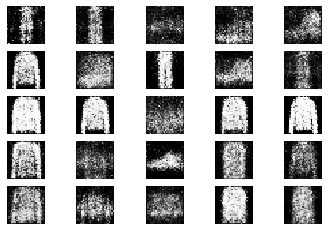

1451 [D loss: 0.569520, acc.: 71.88%] [G loss: 0.966914]
1452 [D loss: 0.562665, acc.: 70.31%] [G loss: 0.871434]
1453 [D loss: 0.561082, acc.: 75.00%] [G loss: 1.031218]
1454 [D loss: 0.656997, acc.: 62.50%] [G loss: 0.911051]
1455 [D loss: 0.485883, acc.: 82.81%] [G loss: 0.984665]
1456 [D loss: 0.636433, acc.: 65.62%] [G loss: 0.902493]
1457 [D loss: 0.597030, acc.: 68.75%] [G loss: 0.916535]
1458 [D loss: 0.590602, acc.: 65.62%] [G loss: 0.980251]
1459 [D loss: 0.592964, acc.: 70.31%] [G loss: 0.977981]
1460 [D loss: 0.655426, acc.: 68.75%] [G loss: 0.939800]
1461 [D loss: 0.743142, acc.: 56.25%] [G loss: 0.823728]
1462 [D loss: 0.626724, acc.: 67.19%] [G loss: 0.919868]
1463 [D loss: 0.624796, acc.: 65.62%] [G loss: 0.864298]
1464 [D loss: 0.632965, acc.: 60.94%] [G loss: 0.877762]
1465 [D loss: 0.601337, acc.: 65.62%] [G loss: 0.925657]
1466 [D loss: 0.548949, acc.: 78.12%] [G loss: 0.870633]
1467 [D loss: 0.688306, acc.: 62.50%] [G loss: 0.838047]
1468 [D loss: 0.665679, acc.: 5

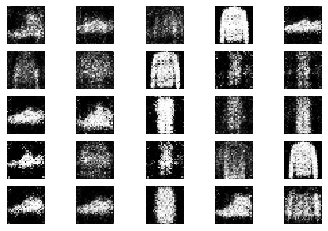

1501 [D loss: 0.606656, acc.: 67.19%] [G loss: 0.922140]
1502 [D loss: 0.576946, acc.: 65.62%] [G loss: 0.928559]
1503 [D loss: 0.604164, acc.: 75.00%] [G loss: 0.865124]
1504 [D loss: 0.660489, acc.: 59.38%] [G loss: 0.920827]
1505 [D loss: 0.651970, acc.: 60.94%] [G loss: 0.903570]
1506 [D loss: 0.571474, acc.: 71.88%] [G loss: 0.809810]
1507 [D loss: 0.595372, acc.: 67.19%] [G loss: 1.012823]
1508 [D loss: 0.567620, acc.: 68.75%] [G loss: 0.872756]
1509 [D loss: 0.637055, acc.: 64.06%] [G loss: 0.868068]
1510 [D loss: 0.602293, acc.: 70.31%] [G loss: 0.840162]
1511 [D loss: 0.632414, acc.: 70.31%] [G loss: 0.918531]
1512 [D loss: 0.540633, acc.: 75.00%] [G loss: 0.919796]
1513 [D loss: 0.604433, acc.: 62.50%] [G loss: 0.870935]
1514 [D loss: 0.657001, acc.: 59.38%] [G loss: 0.946419]
1515 [D loss: 0.617578, acc.: 57.81%] [G loss: 0.900089]
1516 [D loss: 0.627430, acc.: 71.88%] [G loss: 0.974308]
1517 [D loss: 0.578039, acc.: 70.31%] [G loss: 0.973056]
1518 [D loss: 0.549036, acc.: 7

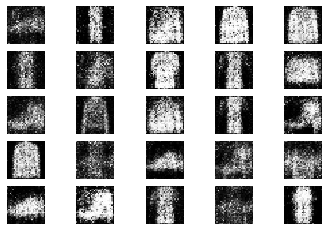

1551 [D loss: 0.633355, acc.: 67.19%] [G loss: 0.930106]
1552 [D loss: 0.592461, acc.: 67.19%] [G loss: 0.960428]
1553 [D loss: 0.590399, acc.: 68.75%] [G loss: 1.017663]
1554 [D loss: 0.638494, acc.: 70.31%] [G loss: 0.907366]
1555 [D loss: 0.614339, acc.: 65.62%] [G loss: 0.910047]
1556 [D loss: 0.629361, acc.: 62.50%] [G loss: 0.937731]
1557 [D loss: 0.563733, acc.: 67.19%] [G loss: 0.921857]
1558 [D loss: 0.607266, acc.: 65.62%] [G loss: 0.915625]
1559 [D loss: 0.593605, acc.: 71.88%] [G loss: 0.955974]
1560 [D loss: 0.550301, acc.: 73.44%] [G loss: 0.916937]
1561 [D loss: 0.596227, acc.: 73.44%] [G loss: 0.926299]
1562 [D loss: 0.603660, acc.: 71.88%] [G loss: 1.013154]
1563 [D loss: 0.557363, acc.: 76.56%] [G loss: 0.842372]
1564 [D loss: 0.644444, acc.: 60.94%] [G loss: 0.874920]
1565 [D loss: 0.611605, acc.: 65.62%] [G loss: 0.857916]
1566 [D loss: 0.601774, acc.: 70.31%] [G loss: 0.851579]
1567 [D loss: 0.608700, acc.: 60.94%] [G loss: 0.980273]
1568 [D loss: 0.553994, acc.: 7

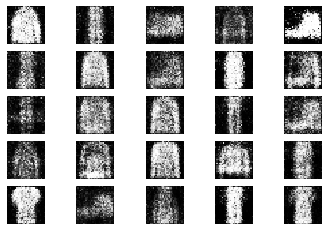

1601 [D loss: 0.605404, acc.: 70.31%] [G loss: 1.086162]
1602 [D loss: 0.620433, acc.: 62.50%] [G loss: 0.978759]
1603 [D loss: 0.620065, acc.: 71.88%] [G loss: 0.920449]
1604 [D loss: 0.592316, acc.: 70.31%] [G loss: 0.872098]
1605 [D loss: 0.621283, acc.: 65.62%] [G loss: 0.904210]
1606 [D loss: 0.597690, acc.: 64.06%] [G loss: 0.944880]
1607 [D loss: 0.600133, acc.: 67.19%] [G loss: 1.031990]
1608 [D loss: 0.579681, acc.: 71.88%] [G loss: 1.037888]
1609 [D loss: 0.664971, acc.: 60.94%] [G loss: 1.008328]
1610 [D loss: 0.630901, acc.: 65.62%] [G loss: 0.901703]
1611 [D loss: 0.604930, acc.: 71.88%] [G loss: 0.883038]
1612 [D loss: 0.649842, acc.: 65.62%] [G loss: 0.875650]
1613 [D loss: 0.653298, acc.: 64.06%] [G loss: 0.933060]
1614 [D loss: 0.525283, acc.: 79.69%] [G loss: 0.933365]
1615 [D loss: 0.671277, acc.: 59.38%] [G loss: 0.952347]
1616 [D loss: 0.574270, acc.: 71.88%] [G loss: 0.869016]
1617 [D loss: 0.507544, acc.: 82.81%] [G loss: 0.871310]
1618 [D loss: 0.618188, acc.: 6

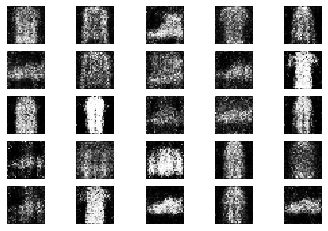

1651 [D loss: 0.595477, acc.: 70.31%] [G loss: 0.827927]
1652 [D loss: 0.573248, acc.: 71.88%] [G loss: 0.925892]
1653 [D loss: 0.588604, acc.: 68.75%] [G loss: 0.944374]
1654 [D loss: 0.634190, acc.: 65.62%] [G loss: 0.995548]
1655 [D loss: 0.547320, acc.: 78.12%] [G loss: 0.920123]
1656 [D loss: 0.587696, acc.: 68.75%] [G loss: 0.933955]
1657 [D loss: 0.639463, acc.: 59.38%] [G loss: 0.907267]
1658 [D loss: 0.648646, acc.: 62.50%] [G loss: 0.954542]
1659 [D loss: 0.588836, acc.: 65.62%] [G loss: 1.055241]
1660 [D loss: 0.609418, acc.: 71.88%] [G loss: 0.989476]
1661 [D loss: 0.583705, acc.: 65.62%] [G loss: 0.905064]
1662 [D loss: 0.581882, acc.: 68.75%] [G loss: 0.902764]
1663 [D loss: 0.611433, acc.: 65.62%] [G loss: 1.004108]
1664 [D loss: 0.623738, acc.: 67.19%] [G loss: 0.918011]
1665 [D loss: 0.685884, acc.: 54.69%] [G loss: 0.928094]
1666 [D loss: 0.686904, acc.: 56.25%] [G loss: 0.954551]
1667 [D loss: 0.624029, acc.: 68.75%] [G loss: 1.047776]
1668 [D loss: 0.594762, acc.: 6

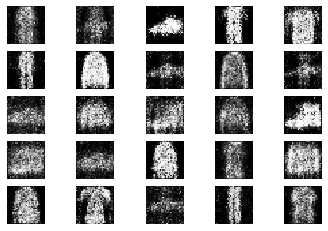

1701 [D loss: 0.560385, acc.: 78.12%] [G loss: 1.004461]
1702 [D loss: 0.605657, acc.: 71.88%] [G loss: 1.052687]
1703 [D loss: 0.665836, acc.: 56.25%] [G loss: 0.839340]
1704 [D loss: 0.611941, acc.: 70.31%] [G loss: 0.935843]
1705 [D loss: 0.603887, acc.: 70.31%] [G loss: 1.005366]
1706 [D loss: 0.612939, acc.: 67.19%] [G loss: 0.945956]
1707 [D loss: 0.642325, acc.: 60.94%] [G loss: 1.011614]
1708 [D loss: 0.611751, acc.: 65.62%] [G loss: 0.918906]
1709 [D loss: 0.638676, acc.: 60.94%] [G loss: 0.898999]
1710 [D loss: 0.629655, acc.: 62.50%] [G loss: 0.948568]
1711 [D loss: 0.589561, acc.: 75.00%] [G loss: 0.973073]
1712 [D loss: 0.654703, acc.: 65.62%] [G loss: 0.964800]
1713 [D loss: 0.626693, acc.: 56.25%] [G loss: 1.033372]
1714 [D loss: 0.644485, acc.: 68.75%] [G loss: 1.053716]
1715 [D loss: 0.581972, acc.: 70.31%] [G loss: 0.963211]
1716 [D loss: 0.617087, acc.: 59.38%] [G loss: 0.968173]
1717 [D loss: 0.644994, acc.: 64.06%] [G loss: 0.916167]
1718 [D loss: 0.670873, acc.: 5

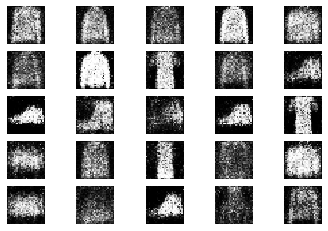

1751 [D loss: 0.563756, acc.: 75.00%] [G loss: 0.917626]
1752 [D loss: 0.550941, acc.: 78.12%] [G loss: 1.004551]
1753 [D loss: 0.662700, acc.: 64.06%] [G loss: 0.859343]
1754 [D loss: 0.570607, acc.: 76.56%] [G loss: 0.810679]
1755 [D loss: 0.565903, acc.: 67.19%] [G loss: 0.934080]
1756 [D loss: 0.664686, acc.: 54.69%] [G loss: 1.064700]
1757 [D loss: 0.611307, acc.: 70.31%] [G loss: 0.899209]
1758 [D loss: 0.641981, acc.: 67.19%] [G loss: 0.980660]
1759 [D loss: 0.607502, acc.: 68.75%] [G loss: 0.992256]
1760 [D loss: 0.629434, acc.: 68.75%] [G loss: 0.923917]
1761 [D loss: 0.602055, acc.: 67.19%] [G loss: 0.984686]
1762 [D loss: 0.621391, acc.: 67.19%] [G loss: 0.985778]
1763 [D loss: 0.626477, acc.: 51.56%] [G loss: 0.950830]
1764 [D loss: 0.635183, acc.: 60.94%] [G loss: 0.963198]
1765 [D loss: 0.638988, acc.: 64.06%] [G loss: 0.992944]
1766 [D loss: 0.589469, acc.: 67.19%] [G loss: 0.915359]
1767 [D loss: 0.619234, acc.: 67.19%] [G loss: 0.871453]
1768 [D loss: 0.606470, acc.: 7

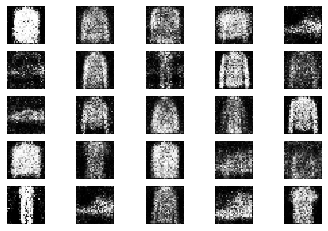

1801 [D loss: 0.544680, acc.: 71.88%] [G loss: 0.991753]
1802 [D loss: 0.682190, acc.: 59.38%] [G loss: 0.909290]
1803 [D loss: 0.651678, acc.: 67.19%] [G loss: 0.956343]
1804 [D loss: 0.601571, acc.: 65.62%] [G loss: 0.909234]
1805 [D loss: 0.652032, acc.: 62.50%] [G loss: 0.980022]
1806 [D loss: 0.605429, acc.: 70.31%] [G loss: 0.990081]
1807 [D loss: 0.518611, acc.: 76.56%] [G loss: 0.999218]
1808 [D loss: 0.587951, acc.: 70.31%] [G loss: 0.977783]
1809 [D loss: 0.565236, acc.: 71.88%] [G loss: 1.017143]
1810 [D loss: 0.601355, acc.: 64.06%] [G loss: 0.987331]
1811 [D loss: 0.581282, acc.: 70.31%] [G loss: 1.056705]
1812 [D loss: 0.546546, acc.: 78.12%] [G loss: 0.961881]
1813 [D loss: 0.602334, acc.: 67.19%] [G loss: 0.950475]
1814 [D loss: 0.639522, acc.: 62.50%] [G loss: 1.011569]
1815 [D loss: 0.637156, acc.: 57.81%] [G loss: 0.960773]
1816 [D loss: 0.585141, acc.: 65.62%] [G loss: 0.993154]
1817 [D loss: 0.556006, acc.: 68.75%] [G loss: 1.009616]
1818 [D loss: 0.585805, acc.: 6

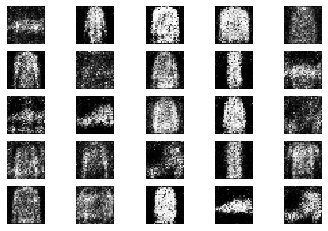

1851 [D loss: 0.593036, acc.: 70.31%] [G loss: 0.876242]
1852 [D loss: 0.632407, acc.: 60.94%] [G loss: 0.837757]
1853 [D loss: 0.596779, acc.: 65.62%] [G loss: 0.903609]
1854 [D loss: 0.645592, acc.: 57.81%] [G loss: 1.052309]
1855 [D loss: 0.569263, acc.: 75.00%] [G loss: 0.992175]
1856 [D loss: 0.663900, acc.: 54.69%] [G loss: 1.055803]
1857 [D loss: 0.592341, acc.: 67.19%] [G loss: 1.037046]
1858 [D loss: 0.618461, acc.: 71.88%] [G loss: 0.992593]
1859 [D loss: 0.591865, acc.: 76.56%] [G loss: 1.025406]
1860 [D loss: 0.634512, acc.: 60.94%] [G loss: 1.013809]
1861 [D loss: 0.591348, acc.: 75.00%] [G loss: 0.951295]
1862 [D loss: 0.523580, acc.: 76.56%] [G loss: 1.005919]
1863 [D loss: 0.641871, acc.: 59.38%] [G loss: 0.923139]
1864 [D loss: 0.584340, acc.: 76.56%] [G loss: 0.905169]
1865 [D loss: 0.628385, acc.: 64.06%] [G loss: 0.887178]
1866 [D loss: 0.599714, acc.: 60.94%] [G loss: 0.902032]
1867 [D loss: 0.572396, acc.: 75.00%] [G loss: 0.933962]
1868 [D loss: 0.586725, acc.: 7

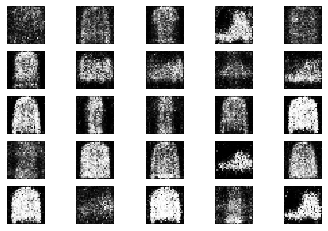

1901 [D loss: 0.544518, acc.: 70.31%] [G loss: 0.994678]
1902 [D loss: 0.594633, acc.: 65.62%] [G loss: 0.971685]
1903 [D loss: 0.612206, acc.: 62.50%] [G loss: 1.098854]
1904 [D loss: 0.749236, acc.: 50.00%] [G loss: 1.017382]
1905 [D loss: 0.571648, acc.: 73.44%] [G loss: 1.010651]
1906 [D loss: 0.529082, acc.: 75.00%] [G loss: 0.973106]
1907 [D loss: 0.719489, acc.: 53.12%] [G loss: 0.906058]
1908 [D loss: 0.726590, acc.: 50.00%] [G loss: 1.042782]
1909 [D loss: 0.564287, acc.: 71.88%] [G loss: 1.030152]
1910 [D loss: 0.598602, acc.: 68.75%] [G loss: 0.968682]
1911 [D loss: 0.565868, acc.: 73.44%] [G loss: 1.029412]
1912 [D loss: 0.658478, acc.: 64.06%] [G loss: 0.940101]
1913 [D loss: 0.567195, acc.: 71.88%] [G loss: 0.929918]
1914 [D loss: 0.576664, acc.: 70.31%] [G loss: 0.809462]
1915 [D loss: 0.645816, acc.: 64.06%] [G loss: 0.897086]
1916 [D loss: 0.627553, acc.: 62.50%] [G loss: 1.034833]
1917 [D loss: 0.616334, acc.: 68.75%] [G loss: 0.975208]
1918 [D loss: 0.630233, acc.: 6

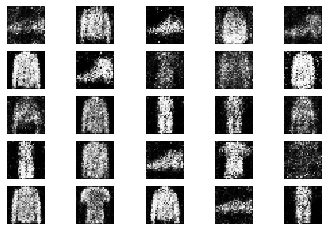

1951 [D loss: 0.569428, acc.: 71.88%] [G loss: 1.016401]
1952 [D loss: 0.657269, acc.: 62.50%] [G loss: 0.997750]
1953 [D loss: 0.575546, acc.: 75.00%] [G loss: 1.019560]
1954 [D loss: 0.548267, acc.: 75.00%] [G loss: 0.996848]
1955 [D loss: 0.592105, acc.: 67.19%] [G loss: 0.982777]
1956 [D loss: 0.583529, acc.: 71.88%] [G loss: 0.949296]
1957 [D loss: 0.600533, acc.: 75.00%] [G loss: 1.005588]
1958 [D loss: 0.574193, acc.: 75.00%] [G loss: 0.969794]
1959 [D loss: 0.604752, acc.: 65.62%] [G loss: 1.016456]
1960 [D loss: 0.637315, acc.: 64.06%] [G loss: 0.933961]
1961 [D loss: 0.551903, acc.: 71.88%] [G loss: 0.983975]
1962 [D loss: 0.644340, acc.: 67.19%] [G loss: 0.905113]
1963 [D loss: 0.539469, acc.: 76.56%] [G loss: 0.914255]
1964 [D loss: 0.503744, acc.: 79.69%] [G loss: 1.059894]
1965 [D loss: 0.604917, acc.: 65.62%] [G loss: 1.072092]
1966 [D loss: 0.658823, acc.: 56.25%] [G loss: 1.129704]
1967 [D loss: 0.663531, acc.: 59.38%] [G loss: 1.085173]
1968 [D loss: 0.611715, acc.: 7

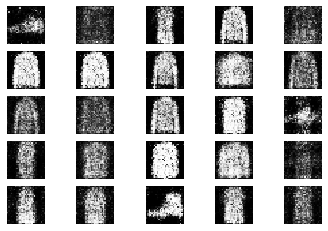

2001 [D loss: 0.601748, acc.: 65.62%] [G loss: 0.924643]
2002 [D loss: 0.607071, acc.: 59.38%] [G loss: 1.066611]
2003 [D loss: 0.572658, acc.: 75.00%] [G loss: 0.972092]
2004 [D loss: 0.612829, acc.: 73.44%] [G loss: 0.953960]
2005 [D loss: 0.634035, acc.: 57.81%] [G loss: 0.981642]
2006 [D loss: 0.586657, acc.: 73.44%] [G loss: 1.023730]
2007 [D loss: 0.571089, acc.: 78.12%] [G loss: 0.830854]
2008 [D loss: 0.623932, acc.: 64.06%] [G loss: 0.978877]
2009 [D loss: 0.615314, acc.: 64.06%] [G loss: 1.003085]
2010 [D loss: 0.646778, acc.: 64.06%] [G loss: 0.823721]
2011 [D loss: 0.632213, acc.: 62.50%] [G loss: 1.006331]
2012 [D loss: 0.648708, acc.: 70.31%] [G loss: 0.962218]
2013 [D loss: 0.655528, acc.: 59.38%] [G loss: 1.032894]
2014 [D loss: 0.663286, acc.: 60.94%] [G loss: 1.007874]
2015 [D loss: 0.600189, acc.: 71.88%] [G loss: 0.935452]
2016 [D loss: 0.569147, acc.: 75.00%] [G loss: 0.950453]
2017 [D loss: 0.583245, acc.: 68.75%] [G loss: 0.918045]
2018 [D loss: 0.633903, acc.: 6

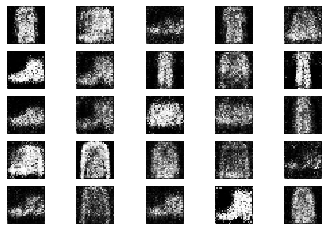

2051 [D loss: 0.636491, acc.: 65.62%] [G loss: 1.097968]
2052 [D loss: 0.577087, acc.: 71.88%] [G loss: 0.978728]
2053 [D loss: 0.627825, acc.: 70.31%] [G loss: 0.941365]
2054 [D loss: 0.621948, acc.: 65.62%] [G loss: 1.089196]
2055 [D loss: 0.662336, acc.: 54.69%] [G loss: 0.962904]
2056 [D loss: 0.575213, acc.: 64.06%] [G loss: 0.950998]
2057 [D loss: 0.565383, acc.: 68.75%] [G loss: 0.907389]
2058 [D loss: 0.559929, acc.: 71.88%] [G loss: 1.085400]
2059 [D loss: 0.626453, acc.: 67.19%] [G loss: 0.967008]
2060 [D loss: 0.617046, acc.: 62.50%] [G loss: 0.928524]
2061 [D loss: 0.651460, acc.: 64.06%] [G loss: 1.051007]
2062 [D loss: 0.632154, acc.: 64.06%] [G loss: 0.998938]
2063 [D loss: 0.607381, acc.: 68.75%] [G loss: 1.087207]
2064 [D loss: 0.676721, acc.: 62.50%] [G loss: 0.946109]
2065 [D loss: 0.669340, acc.: 68.75%] [G loss: 0.879930]
2066 [D loss: 0.539218, acc.: 71.88%] [G loss: 1.073488]
2067 [D loss: 0.658175, acc.: 51.56%] [G loss: 0.943829]
2068 [D loss: 0.645006, acc.: 6

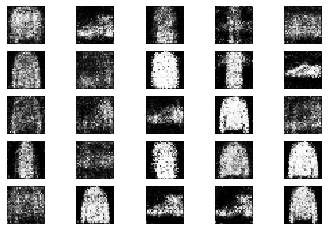

2101 [D loss: 0.651253, acc.: 57.81%] [G loss: 0.983811]
2102 [D loss: 0.559252, acc.: 68.75%] [G loss: 0.992787]
2103 [D loss: 0.608606, acc.: 67.19%] [G loss: 1.049331]
2104 [D loss: 0.620437, acc.: 64.06%] [G loss: 1.015190]
2105 [D loss: 0.612537, acc.: 64.06%] [G loss: 1.069101]
2106 [D loss: 0.646594, acc.: 67.19%] [G loss: 0.841833]
2107 [D loss: 0.645552, acc.: 62.50%] [G loss: 0.993166]
2108 [D loss: 0.636722, acc.: 65.62%] [G loss: 0.877941]
2109 [D loss: 0.638629, acc.: 64.06%] [G loss: 0.960042]
2110 [D loss: 0.587305, acc.: 67.19%] [G loss: 1.001163]
2111 [D loss: 0.594523, acc.: 71.88%] [G loss: 1.020791]
2112 [D loss: 0.594277, acc.: 67.19%] [G loss: 0.973027]
2113 [D loss: 0.642882, acc.: 60.94%] [G loss: 1.003512]
2114 [D loss: 0.604745, acc.: 68.75%] [G loss: 0.926555]
2115 [D loss: 0.620132, acc.: 64.06%] [G loss: 0.918802]
2116 [D loss: 0.652963, acc.: 64.06%] [G loss: 0.926456]
2117 [D loss: 0.561141, acc.: 76.56%] [G loss: 0.939266]
2118 [D loss: 0.674777, acc.: 5

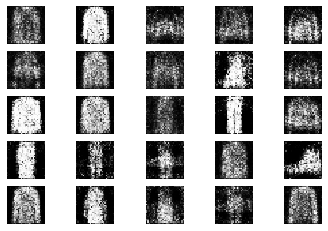

2151 [D loss: 0.560709, acc.: 75.00%] [G loss: 0.966866]
2152 [D loss: 0.640093, acc.: 60.94%] [G loss: 0.911040]
2153 [D loss: 0.576218, acc.: 67.19%] [G loss: 1.018619]
2154 [D loss: 0.544761, acc.: 75.00%] [G loss: 1.043042]
2155 [D loss: 0.644076, acc.: 64.06%] [G loss: 0.976582]
2156 [D loss: 0.623894, acc.: 65.62%] [G loss: 0.991594]
2157 [D loss: 0.583384, acc.: 71.88%] [G loss: 1.048987]
2158 [D loss: 0.625599, acc.: 62.50%] [G loss: 0.869346]
2159 [D loss: 0.639160, acc.: 68.75%] [G loss: 0.956835]
2160 [D loss: 0.566140, acc.: 67.19%] [G loss: 0.975879]
2161 [D loss: 0.596506, acc.: 62.50%] [G loss: 1.012179]
2162 [D loss: 0.597260, acc.: 68.75%] [G loss: 1.022820]
2163 [D loss: 0.581111, acc.: 68.75%] [G loss: 1.006205]
2164 [D loss: 0.679157, acc.: 59.38%] [G loss: 0.889836]
2165 [D loss: 0.653011, acc.: 57.81%] [G loss: 0.921108]
2166 [D loss: 0.632617, acc.: 62.50%] [G loss: 0.887766]
2167 [D loss: 0.558819, acc.: 79.69%] [G loss: 0.972739]
2168 [D loss: 0.600450, acc.: 5

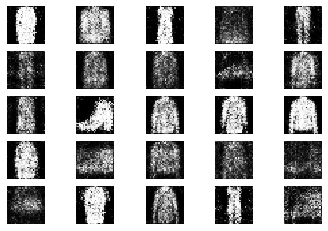

2201 [D loss: 0.522848, acc.: 75.00%] [G loss: 0.961456]
2202 [D loss: 0.586394, acc.: 65.62%] [G loss: 0.987773]
2203 [D loss: 0.593639, acc.: 62.50%] [G loss: 1.022200]
2204 [D loss: 0.748659, acc.: 51.56%] [G loss: 1.038680]
2205 [D loss: 0.560227, acc.: 68.75%] [G loss: 0.997207]
2206 [D loss: 0.681207, acc.: 50.00%] [G loss: 0.954710]
2207 [D loss: 0.635235, acc.: 62.50%] [G loss: 0.817336]
2208 [D loss: 0.583419, acc.: 68.75%] [G loss: 1.024797]
2209 [D loss: 0.594075, acc.: 70.31%] [G loss: 0.955766]
2210 [D loss: 0.584008, acc.: 67.19%] [G loss: 1.038737]
2211 [D loss: 0.602312, acc.: 65.62%] [G loss: 0.960274]
2212 [D loss: 0.544056, acc.: 70.31%] [G loss: 1.157542]
2213 [D loss: 0.633557, acc.: 65.62%] [G loss: 0.944163]
2214 [D loss: 0.612172, acc.: 62.50%] [G loss: 1.007018]
2215 [D loss: 0.636169, acc.: 57.81%] [G loss: 0.927722]
2216 [D loss: 0.572270, acc.: 68.75%] [G loss: 0.880789]
2217 [D loss: 0.601942, acc.: 62.50%] [G loss: 0.803831]
2218 [D loss: 0.596098, acc.: 6

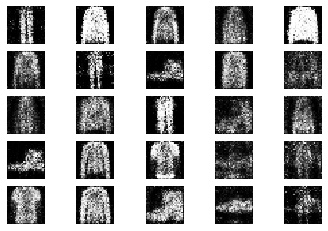

2251 [D loss: 0.543857, acc.: 73.44%] [G loss: 1.031587]
2252 [D loss: 0.620031, acc.: 65.62%] [G loss: 0.982115]
2253 [D loss: 0.586727, acc.: 68.75%] [G loss: 0.949887]
2254 [D loss: 0.594950, acc.: 67.19%] [G loss: 0.964007]
2255 [D loss: 0.616273, acc.: 64.06%] [G loss: 1.021335]
2256 [D loss: 0.657920, acc.: 57.81%] [G loss: 1.038612]
2257 [D loss: 0.551810, acc.: 79.69%] [G loss: 1.078490]
2258 [D loss: 0.609965, acc.: 65.62%] [G loss: 0.964493]
2259 [D loss: 0.578725, acc.: 76.56%] [G loss: 0.929754]
2260 [D loss: 0.592538, acc.: 67.19%] [G loss: 1.027672]
2261 [D loss: 0.586727, acc.: 73.44%] [G loss: 1.041722]
2262 [D loss: 0.580144, acc.: 67.19%] [G loss: 0.928443]
2263 [D loss: 0.650175, acc.: 53.12%] [G loss: 0.997094]
2264 [D loss: 0.549323, acc.: 76.56%] [G loss: 1.057383]
2265 [D loss: 0.607604, acc.: 67.19%] [G loss: 1.009791]
2266 [D loss: 0.550411, acc.: 73.44%] [G loss: 0.917240]
2267 [D loss: 0.553385, acc.: 70.31%] [G loss: 0.875171]
2268 [D loss: 0.529501, acc.: 7

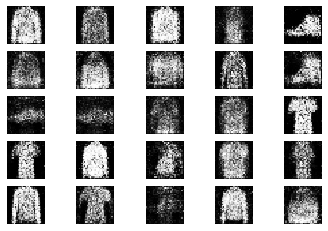

2301 [D loss: 0.563354, acc.: 81.25%] [G loss: 0.921160]
2302 [D loss: 0.674357, acc.: 59.38%] [G loss: 0.970095]
2303 [D loss: 0.668862, acc.: 48.44%] [G loss: 0.900885]
2304 [D loss: 0.716773, acc.: 48.44%] [G loss: 1.013016]
2305 [D loss: 0.561424, acc.: 65.62%] [G loss: 0.949730]
2306 [D loss: 0.599648, acc.: 73.44%] [G loss: 0.941521]
2307 [D loss: 0.593252, acc.: 71.88%] [G loss: 0.951447]
2308 [D loss: 0.630749, acc.: 64.06%] [G loss: 1.003406]
2309 [D loss: 0.587678, acc.: 67.19%] [G loss: 0.914599]
2310 [D loss: 0.598844, acc.: 70.31%] [G loss: 0.899222]
2311 [D loss: 0.592203, acc.: 65.62%] [G loss: 0.929036]
2312 [D loss: 0.619747, acc.: 64.06%] [G loss: 0.987007]
2313 [D loss: 0.628675, acc.: 68.75%] [G loss: 0.904954]
2314 [D loss: 0.564180, acc.: 71.88%] [G loss: 0.985342]
2315 [D loss: 0.604591, acc.: 68.75%] [G loss: 0.969790]
2316 [D loss: 0.548166, acc.: 76.56%] [G loss: 0.971913]
2317 [D loss: 0.586918, acc.: 67.19%] [G loss: 0.973716]
2318 [D loss: 0.616363, acc.: 5

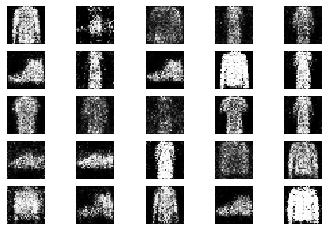

2351 [D loss: 0.530033, acc.: 75.00%] [G loss: 1.040478]
2352 [D loss: 0.627376, acc.: 56.25%] [G loss: 0.899719]
2353 [D loss: 0.593945, acc.: 73.44%] [G loss: 0.956270]
2354 [D loss: 0.603707, acc.: 65.62%] [G loss: 1.004411]
2355 [D loss: 0.640901, acc.: 64.06%] [G loss: 0.908655]
2356 [D loss: 0.665003, acc.: 57.81%] [G loss: 0.791739]
2357 [D loss: 0.639926, acc.: 57.81%] [G loss: 0.895805]
2358 [D loss: 0.589078, acc.: 64.06%] [G loss: 0.927814]
2359 [D loss: 0.689970, acc.: 59.38%] [G loss: 0.922975]
2360 [D loss: 0.534042, acc.: 75.00%] [G loss: 1.120323]
2361 [D loss: 0.574984, acc.: 68.75%] [G loss: 0.991615]
2362 [D loss: 0.599392, acc.: 64.06%] [G loss: 1.118998]
2363 [D loss: 0.678025, acc.: 64.06%] [G loss: 1.050935]
2364 [D loss: 0.572487, acc.: 70.31%] [G loss: 1.119691]
2365 [D loss: 0.699330, acc.: 56.25%] [G loss: 0.899317]
2366 [D loss: 0.626490, acc.: 59.38%] [G loss: 1.020839]
2367 [D loss: 0.536556, acc.: 75.00%] [G loss: 0.947634]
2368 [D loss: 0.581523, acc.: 6

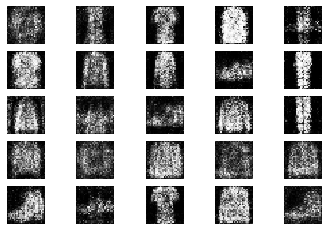

2401 [D loss: 0.607048, acc.: 68.75%] [G loss: 0.919886]
2402 [D loss: 0.630133, acc.: 64.06%] [G loss: 0.885097]
2403 [D loss: 0.581509, acc.: 73.44%] [G loss: 0.936461]
2404 [D loss: 0.621977, acc.: 67.19%] [G loss: 0.937129]
2405 [D loss: 0.622814, acc.: 65.62%] [G loss: 0.926648]
2406 [D loss: 0.603798, acc.: 71.88%] [G loss: 0.867947]
2407 [D loss: 0.518310, acc.: 76.56%] [G loss: 1.032854]
2408 [D loss: 0.490520, acc.: 85.94%] [G loss: 0.950163]
2409 [D loss: 0.646438, acc.: 59.38%] [G loss: 1.074857]
2410 [D loss: 0.562392, acc.: 68.75%] [G loss: 0.977189]
2411 [D loss: 0.572718, acc.: 71.88%] [G loss: 1.108639]
2412 [D loss: 0.597848, acc.: 67.19%] [G loss: 1.144373]
2413 [D loss: 0.576690, acc.: 64.06%] [G loss: 0.964130]
2414 [D loss: 0.603420, acc.: 67.19%] [G loss: 1.027361]
2415 [D loss: 0.608805, acc.: 67.19%] [G loss: 0.939837]
2416 [D loss: 0.654266, acc.: 57.81%] [G loss: 0.950332]
2417 [D loss: 0.656281, acc.: 62.50%] [G loss: 0.917372]
2418 [D loss: 0.583833, acc.: 7

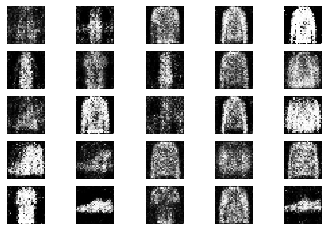

2451 [D loss: 0.659112, acc.: 53.12%] [G loss: 0.932077]
2452 [D loss: 0.615386, acc.: 60.94%] [G loss: 0.954494]
2453 [D loss: 0.578752, acc.: 68.75%] [G loss: 1.013318]
2454 [D loss: 0.567648, acc.: 67.19%] [G loss: 1.040788]
2455 [D loss: 0.577248, acc.: 67.19%] [G loss: 1.060507]
2456 [D loss: 0.592945, acc.: 70.31%] [G loss: 0.990417]
2457 [D loss: 0.601458, acc.: 68.75%] [G loss: 0.874032]
2458 [D loss: 0.609736, acc.: 68.75%] [G loss: 0.968442]
2459 [D loss: 0.622928, acc.: 59.38%] [G loss: 1.007172]
2460 [D loss: 0.566326, acc.: 73.44%] [G loss: 0.908381]
2461 [D loss: 0.635542, acc.: 64.06%] [G loss: 0.890066]
2462 [D loss: 0.584612, acc.: 70.31%] [G loss: 0.868183]
2463 [D loss: 0.616432, acc.: 68.75%] [G loss: 0.973506]
2464 [D loss: 0.737409, acc.: 48.44%] [G loss: 0.919122]
2465 [D loss: 0.607627, acc.: 64.06%] [G loss: 0.910966]
2466 [D loss: 0.660630, acc.: 53.12%] [G loss: 1.007790]
2467 [D loss: 0.616534, acc.: 68.75%] [G loss: 1.015124]
2468 [D loss: 0.618819, acc.: 6

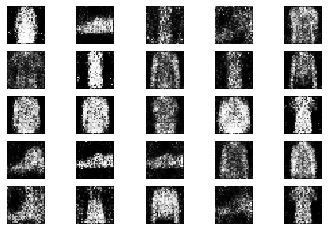

2501 [D loss: 0.584563, acc.: 68.75%] [G loss: 0.908950]
2502 [D loss: 0.650668, acc.: 60.94%] [G loss: 0.982648]
2503 [D loss: 0.562966, acc.: 68.75%] [G loss: 0.944942]
2504 [D loss: 0.598076, acc.: 71.88%] [G loss: 0.993978]
2505 [D loss: 0.625074, acc.: 67.19%] [G loss: 0.942544]
2506 [D loss: 0.595482, acc.: 70.31%] [G loss: 0.924312]
2507 [D loss: 0.584854, acc.: 70.31%] [G loss: 1.016214]
2508 [D loss: 0.650617, acc.: 50.00%] [G loss: 0.959102]
2509 [D loss: 0.562682, acc.: 68.75%] [G loss: 0.915927]
2510 [D loss: 0.587185, acc.: 65.62%] [G loss: 0.947520]
2511 [D loss: 0.629747, acc.: 57.81%] [G loss: 0.957886]
2512 [D loss: 0.569174, acc.: 70.31%] [G loss: 0.897332]
2513 [D loss: 0.613032, acc.: 60.94%] [G loss: 0.993000]
2514 [D loss: 0.639882, acc.: 53.12%] [G loss: 0.965030]
2515 [D loss: 0.620242, acc.: 65.62%] [G loss: 0.956261]
2516 [D loss: 0.592691, acc.: 68.75%] [G loss: 1.015949]
2517 [D loss: 0.708150, acc.: 54.69%] [G loss: 0.948003]
2518 [D loss: 0.610519, acc.: 6

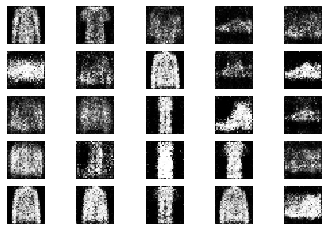

2551 [D loss: 0.565805, acc.: 70.31%] [G loss: 0.977436]
2552 [D loss: 0.598853, acc.: 59.38%] [G loss: 1.026063]
2553 [D loss: 0.629720, acc.: 64.06%] [G loss: 1.016302]
2554 [D loss: 0.604142, acc.: 65.62%] [G loss: 0.861474]
2555 [D loss: 0.648401, acc.: 60.94%] [G loss: 1.007720]
2556 [D loss: 0.614036, acc.: 65.62%] [G loss: 1.031371]
2557 [D loss: 0.607968, acc.: 65.62%] [G loss: 1.022011]
2558 [D loss: 0.591148, acc.: 71.88%] [G loss: 0.965147]
2559 [D loss: 0.599563, acc.: 70.31%] [G loss: 1.027382]
2560 [D loss: 0.657831, acc.: 60.94%] [G loss: 0.929235]
2561 [D loss: 0.653771, acc.: 53.12%] [G loss: 0.884517]
2562 [D loss: 0.568973, acc.: 73.44%] [G loss: 0.936588]
2563 [D loss: 0.582428, acc.: 71.88%] [G loss: 0.907251]
2564 [D loss: 0.581759, acc.: 65.62%] [G loss: 1.021413]
2565 [D loss: 0.595278, acc.: 67.19%] [G loss: 1.010394]
2566 [D loss: 0.554489, acc.: 68.75%] [G loss: 1.087335]
2567 [D loss: 0.670119, acc.: 57.81%] [G loss: 0.939583]
2568 [D loss: 0.585147, acc.: 6

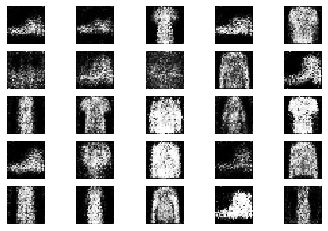

2601 [D loss: 0.613103, acc.: 64.06%] [G loss: 0.921826]
2602 [D loss: 0.602375, acc.: 68.75%] [G loss: 1.031367]
2603 [D loss: 0.671647, acc.: 59.38%] [G loss: 0.922046]
2604 [D loss: 0.581656, acc.: 71.88%] [G loss: 0.909373]
2605 [D loss: 0.528663, acc.: 78.12%] [G loss: 0.969172]
2606 [D loss: 0.640458, acc.: 67.19%] [G loss: 0.971024]
2607 [D loss: 0.591427, acc.: 62.50%] [G loss: 0.957700]
2608 [D loss: 0.660652, acc.: 59.38%] [G loss: 1.016573]
2609 [D loss: 0.593811, acc.: 68.75%] [G loss: 0.967116]
2610 [D loss: 0.599099, acc.: 59.38%] [G loss: 1.015967]
2611 [D loss: 0.556166, acc.: 70.31%] [G loss: 0.985107]
2612 [D loss: 0.624129, acc.: 64.06%] [G loss: 1.032363]
2613 [D loss: 0.594266, acc.: 67.19%] [G loss: 1.023457]
2614 [D loss: 0.590586, acc.: 64.06%] [G loss: 1.023899]
2615 [D loss: 0.558918, acc.: 75.00%] [G loss: 0.938226]
2616 [D loss: 0.679142, acc.: 57.81%] [G loss: 0.937359]
2617 [D loss: 0.647162, acc.: 59.38%] [G loss: 0.961969]
2618 [D loss: 0.644717, acc.: 5

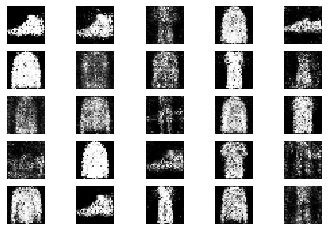

2651 [D loss: 0.586874, acc.: 73.44%] [G loss: 1.153286]
2652 [D loss: 0.574173, acc.: 73.44%] [G loss: 1.033969]
2653 [D loss: 0.613184, acc.: 68.75%] [G loss: 0.975346]
2654 [D loss: 0.563704, acc.: 68.75%] [G loss: 0.989088]
2655 [D loss: 0.687352, acc.: 62.50%] [G loss: 1.043190]
2656 [D loss: 0.606029, acc.: 64.06%] [G loss: 0.942063]
2657 [D loss: 0.581844, acc.: 68.75%] [G loss: 0.989118]
2658 [D loss: 0.563660, acc.: 67.19%] [G loss: 1.015505]
2659 [D loss: 0.574995, acc.: 76.56%] [G loss: 1.120247]
2660 [D loss: 0.593682, acc.: 67.19%] [G loss: 0.924111]
2661 [D loss: 0.575181, acc.: 70.31%] [G loss: 1.071193]
2662 [D loss: 0.594598, acc.: 75.00%] [G loss: 0.995828]
2663 [D loss: 0.552029, acc.: 73.44%] [G loss: 0.991907]
2664 [D loss: 0.578323, acc.: 67.19%] [G loss: 0.980145]
2665 [D loss: 0.628471, acc.: 57.81%] [G loss: 1.082240]
2666 [D loss: 0.671962, acc.: 53.12%] [G loss: 0.978043]
2667 [D loss: 0.578299, acc.: 68.75%] [G loss: 0.945952]
2668 [D loss: 0.607644, acc.: 7

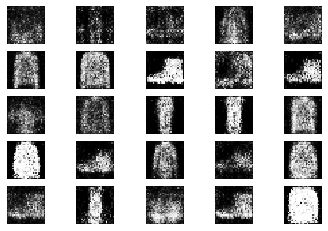

2701 [D loss: 0.608877, acc.: 65.62%] [G loss: 0.970306]
2702 [D loss: 0.693242, acc.: 51.56%] [G loss: 0.928338]
2703 [D loss: 0.569845, acc.: 68.75%] [G loss: 0.990837]
2704 [D loss: 0.628438, acc.: 68.75%] [G loss: 1.068921]
2705 [D loss: 0.678971, acc.: 54.69%] [G loss: 1.037170]
2706 [D loss: 0.609657, acc.: 67.19%] [G loss: 0.948543]
2707 [D loss: 0.614909, acc.: 62.50%] [G loss: 0.971684]
2708 [D loss: 0.565571, acc.: 67.19%] [G loss: 0.983294]
2709 [D loss: 0.593926, acc.: 73.44%] [G loss: 0.950930]
2710 [D loss: 0.584214, acc.: 68.75%] [G loss: 1.047965]
2711 [D loss: 0.537153, acc.: 78.12%] [G loss: 1.006569]
2712 [D loss: 0.628379, acc.: 64.06%] [G loss: 0.955036]
2713 [D loss: 0.648572, acc.: 70.31%] [G loss: 0.991701]
2714 [D loss: 0.666413, acc.: 64.06%] [G loss: 0.863332]
2715 [D loss: 0.573443, acc.: 71.88%] [G loss: 0.985726]
2716 [D loss: 0.614652, acc.: 62.50%] [G loss: 0.908614]
2717 [D loss: 0.553467, acc.: 78.12%] [G loss: 0.904747]
2718 [D loss: 0.593016, acc.: 6

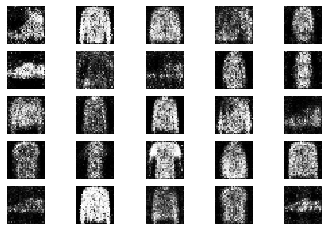

2751 [D loss: 0.636387, acc.: 67.19%] [G loss: 1.017837]
2752 [D loss: 0.550751, acc.: 71.88%] [G loss: 1.030518]
2753 [D loss: 0.596331, acc.: 67.19%] [G loss: 1.069951]
2754 [D loss: 0.620951, acc.: 62.50%] [G loss: 1.021944]
2755 [D loss: 0.604965, acc.: 64.06%] [G loss: 0.971915]
2756 [D loss: 0.630260, acc.: 62.50%] [G loss: 0.978741]
2757 [D loss: 0.565350, acc.: 78.12%] [G loss: 1.074573]
2758 [D loss: 0.586081, acc.: 64.06%] [G loss: 0.939394]
2759 [D loss: 0.600730, acc.: 67.19%] [G loss: 1.058293]
2760 [D loss: 0.605719, acc.: 65.62%] [G loss: 0.952168]
2761 [D loss: 0.620967, acc.: 65.62%] [G loss: 0.909064]
2762 [D loss: 0.590725, acc.: 73.44%] [G loss: 0.938414]
2763 [D loss: 0.539987, acc.: 71.88%] [G loss: 0.824841]
2764 [D loss: 0.542231, acc.: 75.00%] [G loss: 0.940645]
2765 [D loss: 0.585800, acc.: 78.12%] [G loss: 1.005269]
2766 [D loss: 0.562343, acc.: 71.88%] [G loss: 1.032093]
2767 [D loss: 0.583826, acc.: 67.19%] [G loss: 1.001899]
2768 [D loss: 0.565224, acc.: 6

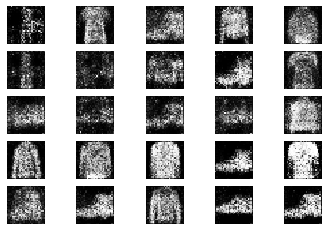

2801 [D loss: 0.580598, acc.: 67.19%] [G loss: 0.952354]
2802 [D loss: 0.617196, acc.: 67.19%] [G loss: 0.903137]
2803 [D loss: 0.524400, acc.: 73.44%] [G loss: 0.958501]
2804 [D loss: 0.667631, acc.: 57.81%] [G loss: 0.925008]
2805 [D loss: 0.539523, acc.: 71.88%] [G loss: 1.060672]
2806 [D loss: 0.579208, acc.: 65.62%] [G loss: 0.994035]
2807 [D loss: 0.556976, acc.: 75.00%] [G loss: 1.061341]
2808 [D loss: 0.647982, acc.: 59.38%] [G loss: 0.991811]
2809 [D loss: 0.619804, acc.: 60.94%] [G loss: 1.015689]
2810 [D loss: 0.592492, acc.: 71.88%] [G loss: 1.017782]
2811 [D loss: 0.629802, acc.: 57.81%] [G loss: 0.913598]
2812 [D loss: 0.591979, acc.: 68.75%] [G loss: 0.940426]
2813 [D loss: 0.614244, acc.: 64.06%] [G loss: 1.030827]
2814 [D loss: 0.697654, acc.: 54.69%] [G loss: 0.927480]
2815 [D loss: 0.542805, acc.: 71.88%] [G loss: 0.916129]
2816 [D loss: 0.612267, acc.: 62.50%] [G loss: 0.891125]
2817 [D loss: 0.603845, acc.: 59.38%] [G loss: 1.000679]
2818 [D loss: 0.543231, acc.: 7

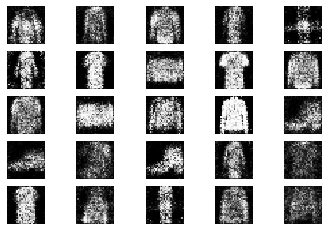

2851 [D loss: 0.674324, acc.: 59.38%] [G loss: 0.974581]
2852 [D loss: 0.602734, acc.: 71.88%] [G loss: 0.891931]
2853 [D loss: 0.564721, acc.: 75.00%] [G loss: 1.060622]
2854 [D loss: 0.671591, acc.: 59.38%] [G loss: 1.012689]
2855 [D loss: 0.637635, acc.: 67.19%] [G loss: 0.983629]
2856 [D loss: 0.621736, acc.: 60.94%] [G loss: 1.033095]
2857 [D loss: 0.621502, acc.: 68.75%] [G loss: 1.002567]
2858 [D loss: 0.643345, acc.: 57.81%] [G loss: 1.064842]
2859 [D loss: 0.625484, acc.: 70.31%] [G loss: 0.943813]
2860 [D loss: 0.602307, acc.: 70.31%] [G loss: 0.889541]
2861 [D loss: 0.628874, acc.: 59.38%] [G loss: 0.970965]
2862 [D loss: 0.640635, acc.: 60.94%] [G loss: 0.982234]
2863 [D loss: 0.615845, acc.: 64.06%] [G loss: 1.019138]
2864 [D loss: 0.672974, acc.: 67.19%] [G loss: 0.898699]
2865 [D loss: 0.604995, acc.: 67.19%] [G loss: 1.006963]
2866 [D loss: 0.555881, acc.: 75.00%] [G loss: 1.031718]
2867 [D loss: 0.589066, acc.: 68.75%] [G loss: 0.889821]
2868 [D loss: 0.581829, acc.: 7

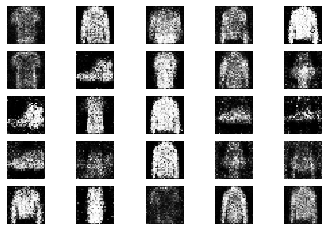

2901 [D loss: 0.619783, acc.: 65.62%] [G loss: 1.031371]
2902 [D loss: 0.599386, acc.: 67.19%] [G loss: 1.062474]
2903 [D loss: 0.616084, acc.: 68.75%] [G loss: 0.988700]
2904 [D loss: 0.563472, acc.: 73.44%] [G loss: 0.932309]
2905 [D loss: 0.650221, acc.: 60.94%] [G loss: 0.985077]
2906 [D loss: 0.585421, acc.: 67.19%] [G loss: 0.958185]
2907 [D loss: 0.644482, acc.: 56.25%] [G loss: 0.928207]
2908 [D loss: 0.626694, acc.: 62.50%] [G loss: 1.075682]
2909 [D loss: 0.688131, acc.: 54.69%] [G loss: 0.990819]
2910 [D loss: 0.564085, acc.: 70.31%] [G loss: 0.955999]
2911 [D loss: 0.552980, acc.: 67.19%] [G loss: 1.032538]
2912 [D loss: 0.595578, acc.: 67.19%] [G loss: 0.994201]
2913 [D loss: 0.649048, acc.: 60.94%] [G loss: 0.950393]
2914 [D loss: 0.574804, acc.: 71.88%] [G loss: 1.067315]
2915 [D loss: 0.604470, acc.: 70.31%] [G loss: 1.037012]
2916 [D loss: 0.557397, acc.: 71.88%] [G loss: 0.941845]
2917 [D loss: 0.599524, acc.: 70.31%] [G loss: 0.968145]
2918 [D loss: 0.600576, acc.: 6

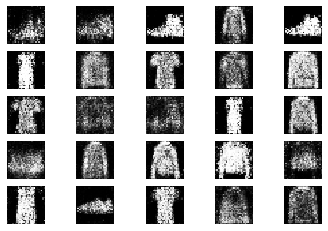

2951 [D loss: 0.594768, acc.: 75.00%] [G loss: 0.920508]
2952 [D loss: 0.562111, acc.: 76.56%] [G loss: 1.032694]
2953 [D loss: 0.589200, acc.: 65.62%] [G loss: 1.035490]
2954 [D loss: 0.649502, acc.: 57.81%] [G loss: 1.040804]
2955 [D loss: 0.640036, acc.: 59.38%] [G loss: 0.985971]
2956 [D loss: 0.539348, acc.: 75.00%] [G loss: 0.989648]
2957 [D loss: 0.594654, acc.: 64.06%] [G loss: 1.105910]
2958 [D loss: 0.578758, acc.: 71.88%] [G loss: 1.112662]
2959 [D loss: 0.709096, acc.: 45.31%] [G loss: 0.952481]
2960 [D loss: 0.622115, acc.: 64.06%] [G loss: 0.881983]
2961 [D loss: 0.622371, acc.: 62.50%] [G loss: 0.927008]
2962 [D loss: 0.523358, acc.: 78.12%] [G loss: 0.981904]
2963 [D loss: 0.575251, acc.: 67.19%] [G loss: 1.059934]
2964 [D loss: 0.612705, acc.: 59.38%] [G loss: 1.066537]
2965 [D loss: 0.554163, acc.: 76.56%] [G loss: 0.980654]
2966 [D loss: 0.682588, acc.: 57.81%] [G loss: 0.927493]
2967 [D loss: 0.566500, acc.: 71.88%] [G loss: 1.002690]
2968 [D loss: 0.611459, acc.: 7

In [26]:
epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    imgs = x_train[idx]

    noise = np.random.normal(0, 1, (batch_size, 100))

    gen_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))

    g_loss = combined.train_on_batch(noise, valid)

    print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

    if epoch % 50 == 0:
        sample_images(epoch)

In [ ]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()